In [1]:
library(plyr)
library(ggplot2)
library(reshape2)
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=18, face="bold",hjust = 0.5),
  axis.title = element_text(size = 18),
  axis.text.x = element_text(size = 14,angle = 40, hjust = 1),
  axis.text.y = element_text(size = 14),

  legend.text = element_text(size = 14), 
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())

Warning message:
“Removed 1434 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


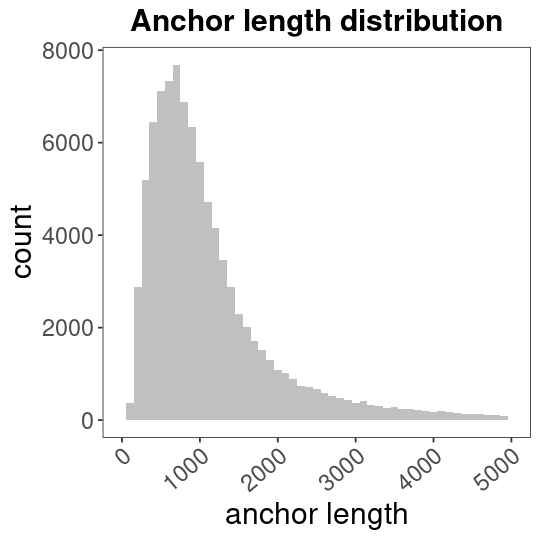

In [85]:
df = data.frame(read.table('GM12878_CTCF_PET_clusters.txt',header=F))
options(repr.plot.width=4.5, repr.plot.height=4.5)
library(ggplot2)
df$anchor = df$V6-df$V5
ggplot(df, aes(anchor)) + 
    geom_histogram(binwidth = 100, position = 'identity',fill="#c0c0c0")+xlim(0,5000)+My_Theme+xlab('anchor length')+
    ggtitle('Anchor length distribution')

Warning message:
“Removed 1475 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


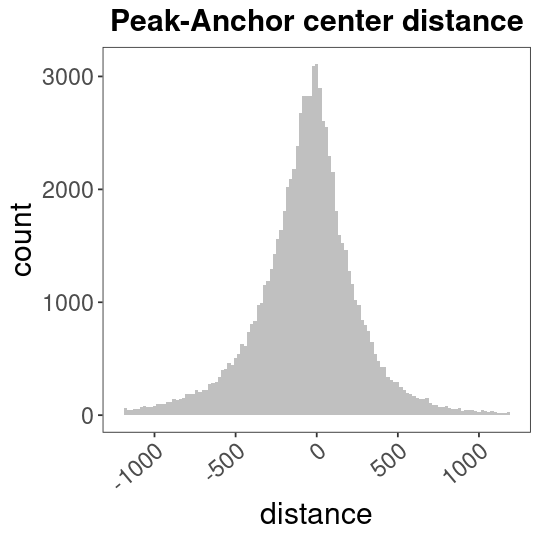

In [11]:
df = data.frame(read.table('CTCF_peak_PET_distance.txt',header=F))
ggplot(df, aes(V1)) + 
    geom_histogram(binwidth = 20, position = 'identity',fill="#c0c0c0")+xlim(-1200,1200)+My_Theme+xlab('distance')+
    ggtitle('Peak-Anchor center distance')

In [15]:
#df = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/GM12878/TF_E2_137_hg19_training_prediction_CTCF_window.txt',header=T))
df = data.frame(read.table('training_withcount.txt',header=T))

In [16]:
df = df[df$label!=-1,]
df = df[df$motif1>0,]
df = df[df$motif2>0,]

In [17]:
library(ggplot2)

My_Theme = theme_bw()+theme(
  plot.title = element_text(size=20, face="bold",hjust = 0.5),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 26,margin = margin(t = 0, r = 0, b = 10, l = 10)),
  axis.text.y = element_text(size = 26),
  legend.text = element_text(size = 26),
#  legend.position = c(.85, .85),
#  legend.justification = c("left", "top"),
  legend.title = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())

In [18]:
df$label=as.factor(df$label)

df$CTCF =  df$height1
df$DNase =  df$DNase1
df$Rad21 =  df$Rad21_1
df$Distance =  df$distance/1000

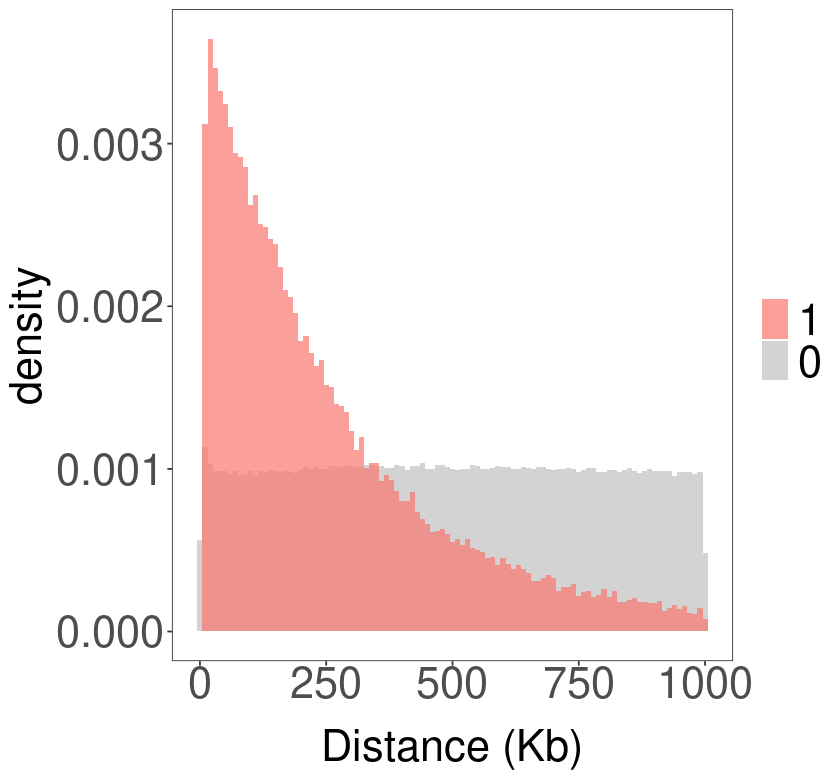

Warning message:
“Removed 2680 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”


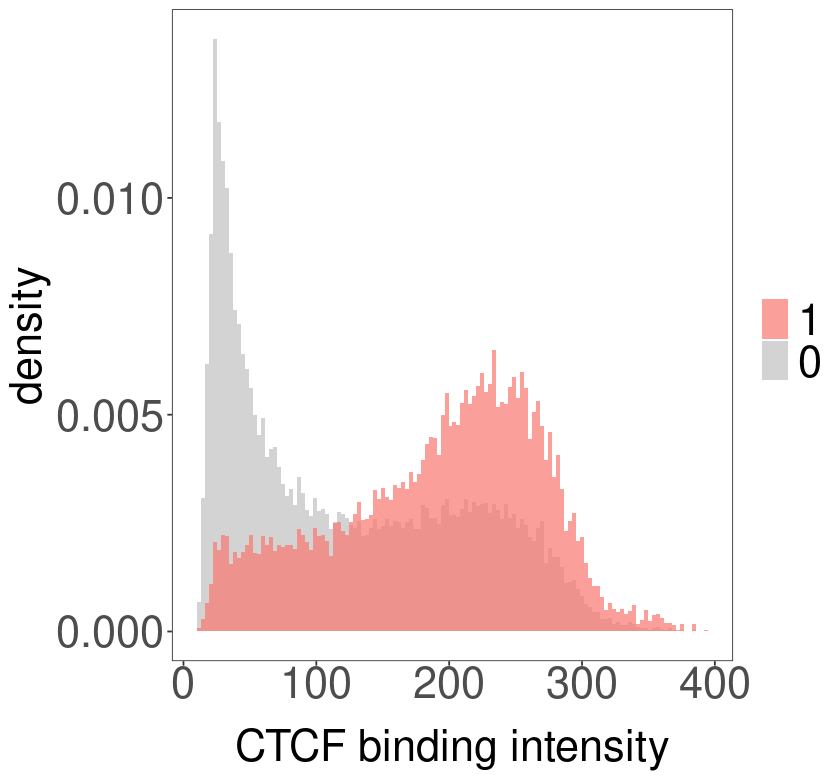

Warning message:
“Removed 2398 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”


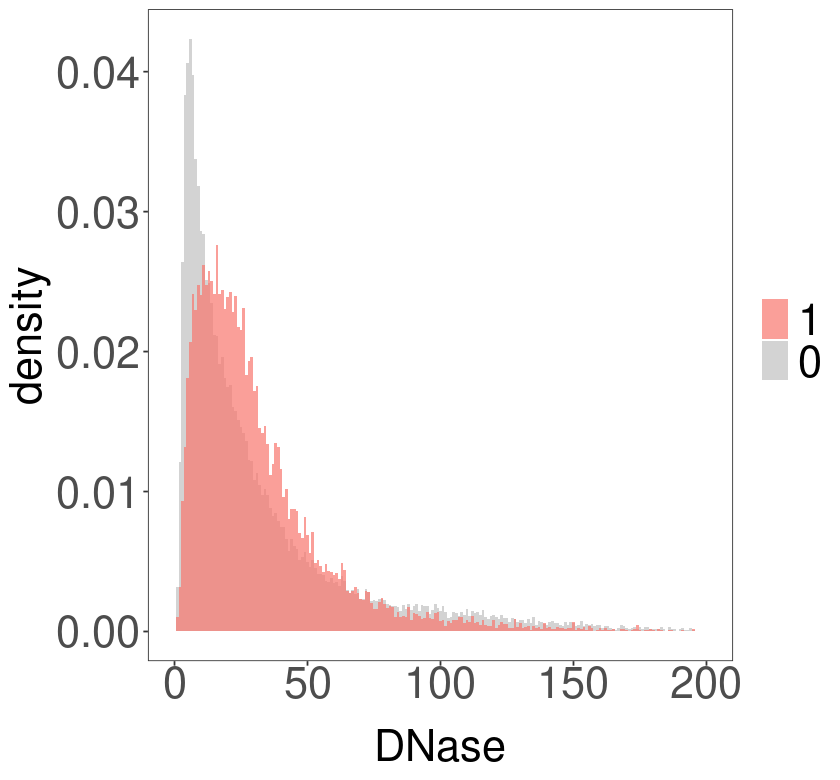

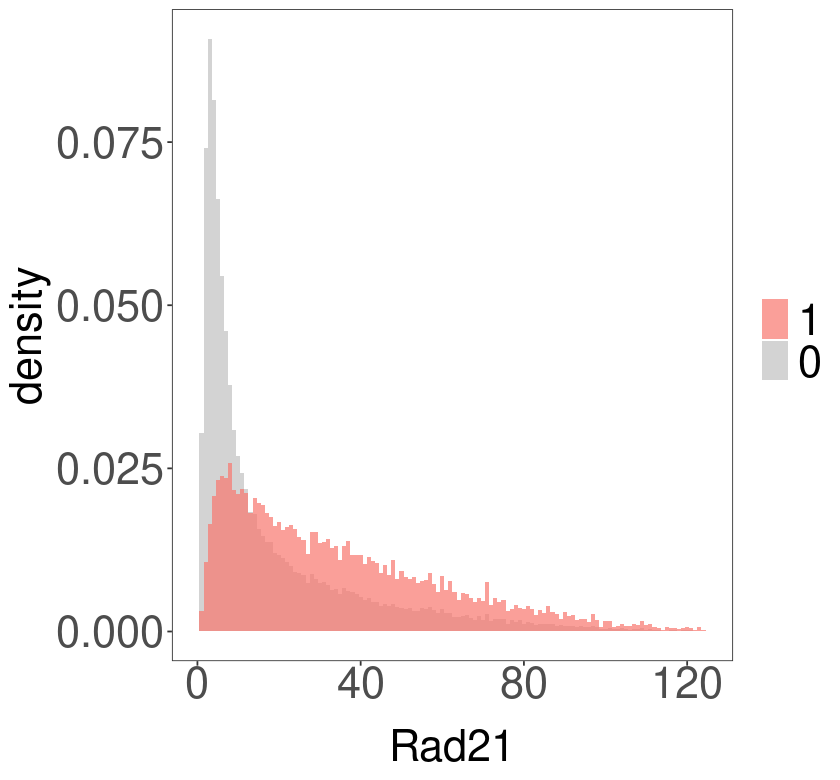

In [19]:
#p1 = hist(df_p$distance, breaks = seq(0,50000000,10000),xlim = c(0,1000000))
#p2 = hist(df_n$distance, breaks = seq(0,50000000,10000),xlim = c(0,1000000))
#plot( p1, col=rgb(0,0,1,1/4),xlim = c(0,1000000),ylim = c(0,15000))
#plot( p2, col=rgb(1,0,0,1/4),xlim = c(0,1000000),ylim = c(0,15000), add=T)
options(repr.plot.width=7, repr.plot.height=6.5)
options(scipen = 200)
ggplot(df, aes(Distance, fill = label)) + 
    geom_histogram(alpha = 0.7, aes(y = ..density..),binwidth = 10, position = 'identity') + My_Theme +
    scale_fill_manual(values = c("#F8766D","#c0c0c0"), breaks = c('1','0')) + xlab('Distance (Kb)')


ggplot(df, aes(CTCF, fill = label)) + 
    geom_histogram(alpha = 0.7, aes(y = ..density..),binwidth = 3, position = 'identity') + My_Theme +
    scale_fill_manual(values = c("#F8766D","#c0c0c0"), breaks = c('1','0')) + xlab('CTCF binding intensity')

ggplot(df, aes(DNase, fill = label)) + 
    geom_histogram(alpha = 0.7, aes(y = ..density..),binwidth = 1, position = 'identity') + My_Theme + xlim(0,200) +
    scale_fill_manual(values = c("#F8766D","#c0c0c0"), breaks = c('1','0'))

ggplot(df, aes(Rad21, fill = label)) + 
    geom_histogram(alpha = 0.7, aes(y = ..density..),binwidth = 1, position = 'identity') + My_Theme + xlim(0,125) +
    scale_fill_manual(values = c("#F8766D","#c0c0c0"), breaks = c('1','0'))


In [20]:
df_p = df[df$label==1,]
df_n = df[df$label==0,]
direction_p = - df_p$strand1 + df_p$strand2
direction_n = - df_n$strand1 + df_n$strand2
table(direction_p)
table(direction_n)

direction_p
   -2     0     2 
35128 18398  1619 

direction_n
    -2      0      2 
236832 542026 285732 

  Orientation Count class
1         Con 35128   non
2         Tan 18398   non
3         Div  1619   non


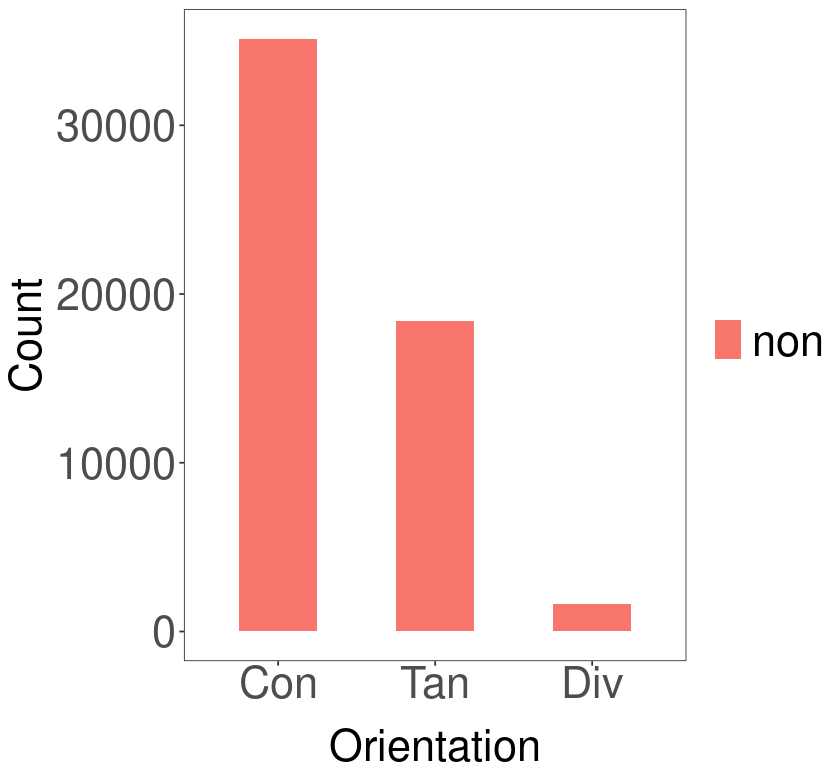

In [24]:
library(reshape2)
library(ggplot2)
df_table = data.frame(table(direction_p))
#df_table$direction_p = c('Convergent','Tandem','Divergent')
df_table$direction_p = c('Con','Tan','Div')
colnames(df_table) = c('Orientation','Count')
df_table$class = c('non','non','non')
print(df_table)
df_table$Orientation <- factor(df_table$Orientation,levels=c('Con','Tan','Div'))
#df_table$label <- factor(df_table$label, levels = rev(levels(df_table$label)))
#barplot(df_table,beside=TRUE,legend=rownames(df_table))
ggplot(df_table, aes(x = Orientation, y = Count,fill=class)) + 
    geom_bar(stat="identity", width=0.5, position=position_dodge()) + My_Theme + scale_fill_manual(values = "#F8766D")


In [7]:
library(reshape2)
options(scipen = -1)
df_table = rbind(table(direction_p),table(direction_n))
colnames(df_table) = c('Convergent','Tandem','Divergent')
#rownames(df_table) = c('interacting','non-interacting')
rownames(df_table) = c('0','1')
df_table = melt(df_table)
colnames(df_table) = c('label','Orientation','Count')
print(df_table)
df_table$label <- factor(df_table$label)
options(repr.plot.width=8, repr.plot.height=6.5)
#df_table$orientation <- factor(df_table$orientation)
#df_table$label <- factor(df_table$label, levels = rev(levels(df_table$label)))
#barplot(df_table,beside=TRUE,legend=rownames(df_table))
ggplot(df_table, aes(x = Orientation, y = Count, fill = label)) + xlab('CTCF motif orientation') +
    geom_bar(stat="identity", position=position_dodge()) + My_Theme + scale_fill_manual(values = c("#F8766D","#c0c0c0"))

ERROR: Error in table(direction_p): object 'direction_p' not found


In [7]:
df$maxheight = pmax(df$height1,df$height2)
df$minheight = pmin(df$height1,df$height2)
df$convergent = as.numeric(df$strand1 - df$strand2 == 2)
df$divergent = as.numeric(df$strand1 - df$strand2 == -2)
df$tandem = as.numeric(df$strand1 - df$strand2 == 0)
#df

In [6]:
df_triplet = data.frame(read.table('traning_positive.txt',header=F))

In [7]:
df_con = df_triplet[df_triplet$V7==2,]
df_tan = df_triplet[df_triplet$V7==0,]
df_div = df_triplet[df_triplet$V7==-2,]
table(df_con$V8)
table(df_tan$V8)
table(df_div$V8)


    0     1 
15037 27546 


    0     1 
 4311 16584 


   0    1 
 545 1351 

In [1]:
df = data.frame(read.table('GM12878_CTCF_PET_clusters_sorted_intersect_triplets_freq_count.txt',header=F))

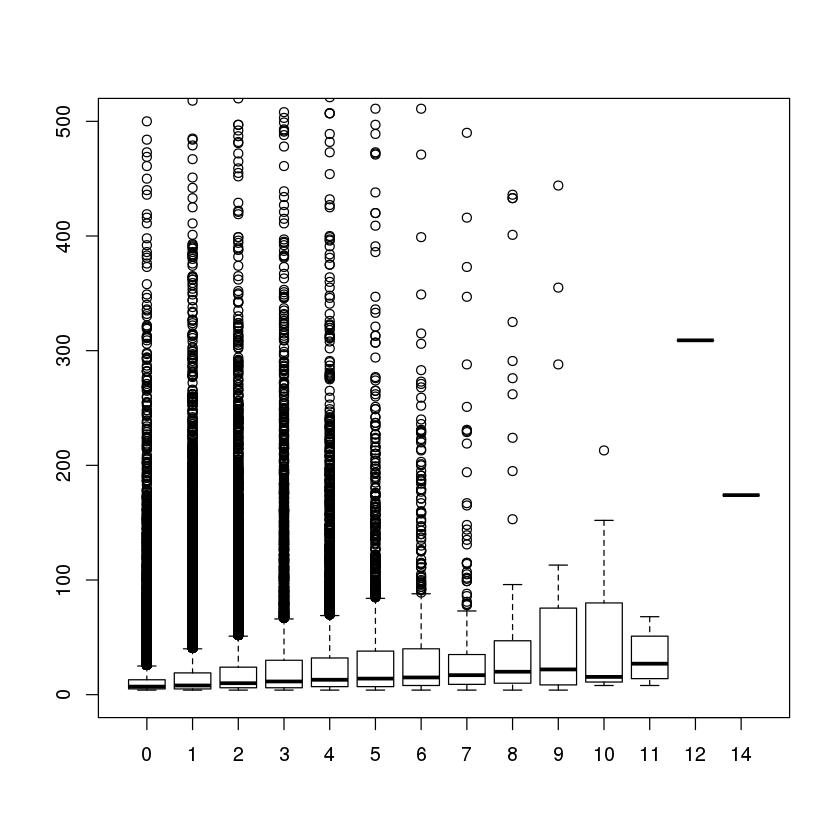

In [6]:
plot(as.factor(df$V3),df$V4,ylim = c(0,500))

In [4]:
cor(df$V3,df$V4)

[1] 0.1469991

In [5]:
table(df$V3)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
19893 17837 12806  7824  4110  1752   752   264    81    35    14     4     1 
   14 
    1 

In [74]:
df_p = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/GM12878/TF_E2_137_hg19_training_prediction_CTCF_window_pos_matched_distance.txt',header=TRUE))
df_n = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/GM12878/TF_E2_137_hg19_training_prediction_CTCF_window_neg_matched_distance.txt',header=TRUE))
rate = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/GM12878/TF_E2_137_hg19_sampling_matched_distance.log',header=TRUE))

In [100]:
df_p = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/GM12878/TF_E2_137_hg19_training_prediction_CTCF_window_pos_matched_window.txt',header=TRUE))
df_n = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/GM12878/TF_E2_137_hg19_training_prediction_CTCF_window_neg_matched_window.txt',header=TRUE))
rate = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/GM12878/TF_E2_137_hg19_sampling_matched_window.log',header=TRUE))

In [22]:
df_p = cbind(df_p,rate)
df_p = df_p[df_p$rate<2,]
df_p$id <- NULL
df_p$rate <- NULL
lambda = 1/300000
df_p$processivity = exp(-df_p$distance*lambda)
df_n$processivity = exp(-df_n$distance*lambda)
print(dim(df_p))
print(dim(df_n))
corr = c()
corr = c(corr, cor(df_p$p12,df_n$p12))
corr = c(corr, cor(df_p$processivity,df_n$processivity))
corr = c(corr, cor(df_p$CTCF_window,df_n$CTCF_window))
corr = c(corr, cor(df_p$p12*df_p$processivity,df_n$p12*df_n$processivity))
corr = c(corr, cor(df_p$p12*df_p$CTCF_window,df_n$p12*df_n$CTCF_window))

[1] 35249    20
[1] 35249    20


In [54]:
addline_format <- function(x,...){
    gsub('\\s','\n',x)
}

In [101]:
        df_p = cbind(df_p,rate)
        df_p = df_p[df_p$rate<2,]
        df_p$id <- NULL
        df_p$rate <- NULL
        lambda = 1/300000
        df_p$processivity = exp(-df_p$distance*lambda)
        df_n$processivity = exp(-df_n$distance*lambda)

In [102]:
library(dplyr)
corr = c()
for(i in 0:9){
        #cv = sample(nrow(df_p), round(dim(df_p)[1]*0.2))
        cv = (i*round(nrow(df_p)/10)+1):((i+1)*round(nrow(df_p)/10)-1)
        df_p_cv = df_p[cv,]
        df_n_cv = df_n[cv,]
        tmp = c(cor(df_p_cv$p12,df_n_cv$p12),
                cor(df_p_cv$processivity,df_n_cv$processivity),
                cor(df_p_cv$CTCF_window,df_n_cv$CTCF_window),
                cor(df_p_cv$p12*df_p_cv$processivity,df_n_cv$p12*df_n_cv$processivity),
                cor(df_p_cv$p12*df_p_cv$CTCF_window,df_n_cv$p12*df_n_cv$CTCF_window))
        corr = rbind(corr,tmp)
}
corr

tmp,0.9456145,0.4281265,0.8665365,0.6112207,0.8676836
tmp,0.9458893,0.4265613,0.8568922,0.5899862,0.8631923
tmp,0.9436698,0.3724845,0.8531642,0.5564442,0.8704947
tmp,0.9474730,0.4283253,0.8712644,0.5922891,0.8678271
tmp,0.9482546,0.3890027,0.8624766,0.6177883,0.8751463
tmp,0.9419538,0.3889755,0.8553235,0.5611053,0.8629260
tmp,0.9449818,0.3872505,0.8390468,0.5805148,0.8655307
tmp,0.9416155,0.3821116,0.8530343,0.5648602,0.8690823
tmp,0.9428837,0.3586058,0.8416825,0.5738697,0.8660725
tmp,0.9407549,0.3954764,0.8509399,0.5759640,0.8630423


In [103]:
me = colMeans(corr)
ci = apply(as.matrix(t(corr)), 1, function(x){mean(x)+c(-1.96,1.96)*sd(x)})
df = t(rbind(me,ci))
colnames(df) = c('Correlation','l','r')

  Correlation         l         r      Features
1   0.9443091 0.9393289 0.9492893       BI\nOri
2   0.3956920 0.3479968 0.4433872          Dist
3   0.8550361 0.8352975 0.8747747            LC
4   0.5824043 0.5421785 0.6226300 BI\nOri\nDist
5   0.8670998 0.8595442 0.8746553   BI\nOri\nLC


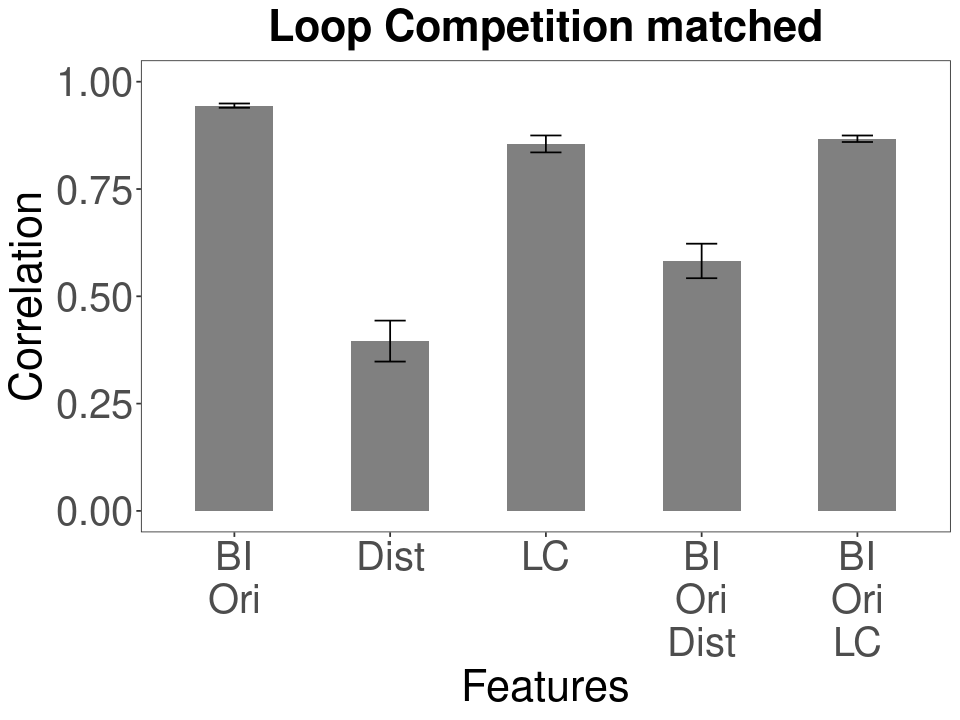

In [104]:
library(ggplot2)
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, face="bold",hjust = 0.5),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 24),
  axis.text.y = element_text(size = 24),
  legend.text = element_text(size = 24), 
  legend.position = c(.05, .95),
  legend.justification = c("left", "top"),
  legend.title=element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())

df1 = data.frame(df, Features = addline_format(c('BI Ori','Dist','LC','BI Ori Dist','BI Ori LC')))
df1$Features <- factor(df1$Features, levels = df1$Features)
print(df1)
options(repr.plot.width=8, repr.plot.height=6)
ggplot(df1, aes(x = Features, y = Correlation)) + ggtitle('Loop Competition matched') + ylim(0,1) +
    geom_bar(stat="identity",width=0.5,fill="#808080")+ My_Theme + ylab('Correlation') +
    geom_errorbar(aes(ymin=l, ymax=r), width=.2, position=position_dodge(.9)) 

#"#E69F00"


In [105]:
require(PRROC)

df_all = rbind(df_p,df_n)
df_all = df_all[sample(nrow(df_all)),]
df_auc = c()
for(i in 1:10){
auc = c()  

#cv = sample(nrow(df_p), round(dim(df_p)[1]*0.1))
#df_p_cv = df_p[cv,]
#df_n_cv = df_n[cv,]
#df = rbind(df_p_cv,df_n_cv)
    
cv = (i*round(nrow(df_p)/10)+1):((i+1)*round(nrow(df_p)/10)-1)
df = df_all[cv,]

fg <- (df$p12)[df$label == 1]
bg <- (df$p12)[df$label == 0]
roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
auc = c(auc,roc$auc)

fg <- (df$processivity)[df$label == 1]
bg <- (df$processivity)[df$label == 0]
roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
auc = c(auc,roc$auc)

fg <- (df$CTCF_window)[df$label == 1]
bg <- (df$CTCF_window)[df$label == 0]
roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
auc = c(auc,roc$auc)

fg <- (df$p12*df$processivity)[df$label == 1]
bg <- (df$p12*df$processivity)[df$label == 0]
roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
auc = c(auc,roc$auc)

fg <- (df$p12*df$CTCF_window)[df$label == 1]
bg <- (df$p12*df$CTCF_window)[df$label == 0]
roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
auc = c(auc,roc$auc)
    
df_auc = rbind(df_auc,auc)
}

In [106]:
me = colMeans(df_auc)
ci = apply(as.matrix(t(df_auc)), 1, function(x){mean(x)+c(-1.96,1.96)*sd(x)})
df = t(rbind(me,ci))
colnames(df) = c('AUROC','l','r')
df

AUROC,l,r
0.5250400,0.5060134,0.5440667
0.5372399,0.5304543,0.5440255
0.5396667,0.5308446,0.5484888
0.5500859,0.5361129,0.5640590
0.5446538,0.5264821,0.5628255


      AUROC         l         r      Features
1 0.5250400 0.5060134 0.5440667       BI\nOri
2 0.5372399 0.5304543 0.5440255          Dist
3 0.5396667 0.5308446 0.5484888            LC
4 0.5500859 0.5361129 0.5640590 BI\nOri\nDist
5 0.5446538 0.5264821 0.5628255   BI\nOri\nLC


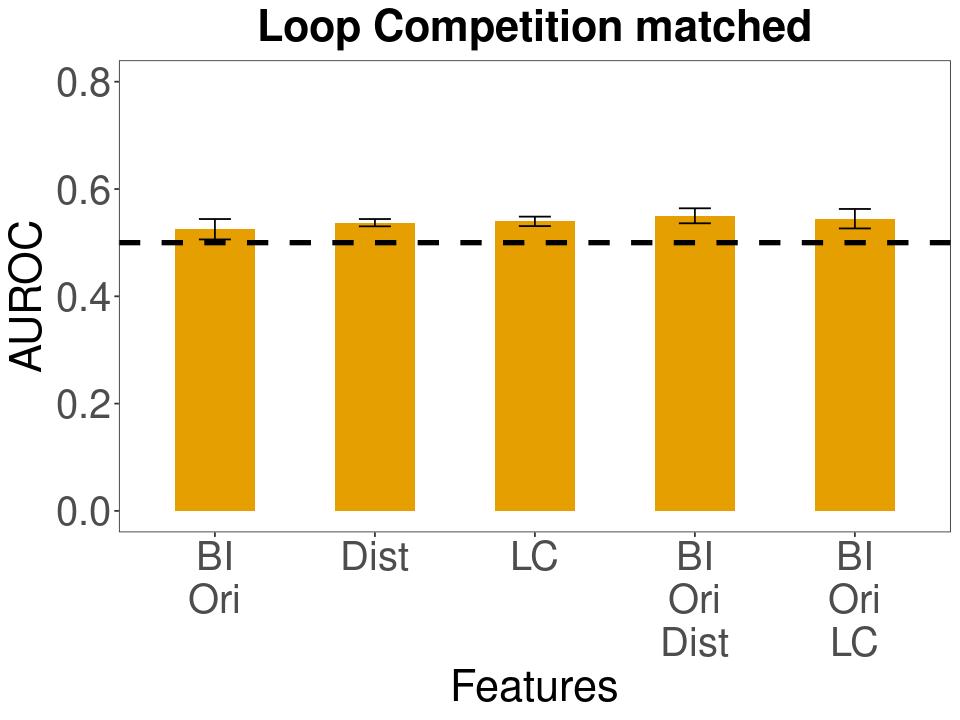

In [107]:
df1 = data.frame(df, Features = addline_format(c('BI Ori','Dist','LC','BI Ori Dist','BI Ori LC')))
df1$Features <- factor(df1$Features, levels = df1$Features)
print(df1)
ggplot(df1, aes(x = Features, y = AUROC)) + ggtitle('Loop Competition matched') +
    geom_bar(stat="identity",width=0.5,fill="#E69F00")+ My_Theme + geom_hline(yintercept=0.5,linetype="dashed", size=1.5) +
    ylim(0,0.8) +
    geom_errorbar(aes(ymin=l, ymax=r), width=.2, position=position_dodge(.9)) 


In [56]:
df = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/GM12878/TF_E2_137_hg19_all_peak_pair_1M_CTCF_window.txt',header=TRUE))
#df = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/HeLa/TF_E2_152_hg19_all_peak_pair_1M_CTCF_window.txt',header=TRUE))
df = df[df$label!=-1,]
df = df[df$motif1>0,]
df = df[df$motif2>0,]

In [57]:
df1 = data.frame(rbind(table(df$chr,df$label)))
#df1$ratio = data.frame(rbind(table(df$chr,df$label)))$X1/data.frame(rbind(table(df$chr,df$label)))$X0

In [105]:
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, face="bold",hjust = 0.5),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 26,margin = margin(t = 0, r = 0, b = 10, l = 10)),
  axis.text.y = element_text(size = 26),
  plot.caption = element_text(size = 22, vjust = 9),
  legend.title = element_blank(),
  legend.text = element_text(size = 16),
  legend.position = c(.85, .95),
  legend.justification = c("right", "top"),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank()
)

In [38]:
group1 = c('chr1','chr22','chr9','chrX')
group2 = c('chr10','chr17','chr18','chr4','chr6')
group3 = c('chr11','chr13','chr20','chr5','chr7')
group4 = c('chr16','chr2','chr3','chr8')
group5 = c('chr12','chr14','chr15','chr19','chr21')

In [124]:
performance = c(0.5961,0.5991,0.6031,0.6033,0.6009)
mean(performance)
sd(performance)

[1] 0.6005

[1] 0.003003331

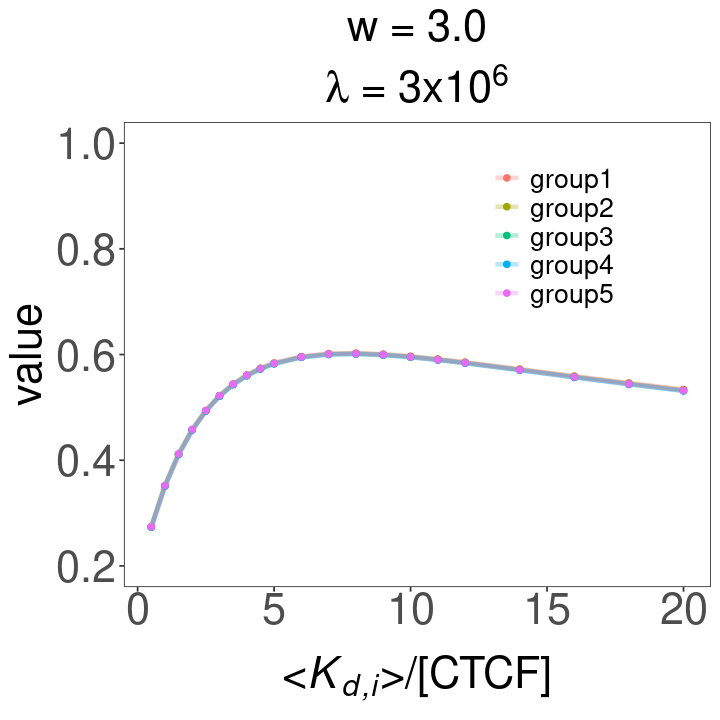

In [122]:
require(PRROC)
a = t(data.matrix(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/GM12878/run_CTCF_window_cv.out',header=F)))
kd = c(0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,14.0,16.0,18.0,20.0)
d = data.frame(cbind(kd,a))
colnames(d) = c('Kd','group1','group2','group3','group4','group5')
d = melt(d,id.vars='Kd')
#options(repr.plot.width=6, repr.plot.height=6)
ggplot(data=d, aes(x=Kd, y=value, group=variable, color=variable)) + ggtitle(expression(atop("w = 3.0",paste(lambda," = 3x",10^6))))+
  geom_line(size=1.3,alpha=0.3,position=position_dodge(width=0.05))+geom_point()+My_Theme+ylim(0.2,1)+
  labs(x=expression(paste('<',italic(K[paste('d',',','i')]),'>/[CTCF]')))

In [99]:
a <- array(numeric(),c(15,0)) 
for(group in list(group1,group2,group3,group4,group5)){
#    test = df[df$chr %in% group,]
    train = df[!(df$chr %in% group),]
#    print(table(test$label))
    pr_array = c()
    for(l in seq(1,8,0.5)){
    train$ori = l^((train$strand1-train$strand2-2)/2)
    train$p1 = train$height1/(train$height1+kd)
    train$p2 = train$height2/(train$height2+kd)
    train$p12 = train$p1*train$p2*train$ori
    fg <- (train$p12*train$CTCF_window*train$processivity)[train$label == 1]
    bg <- (train$p12*train$CTCF_window*train$processivity)[train$label == 0]
    pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
    pr_array = c(pr_array,(pr$auc.integral))
    }
    a = cbind(a,pr_array)
}

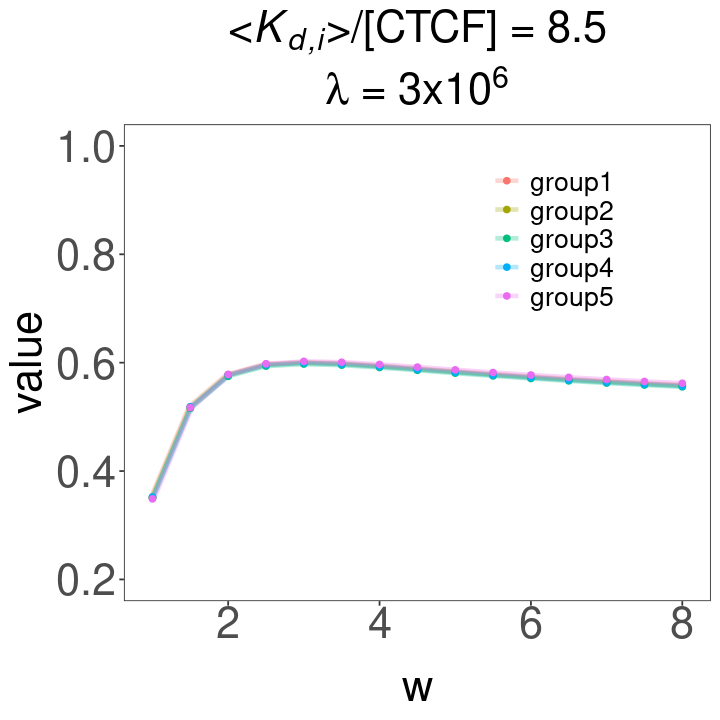

In [106]:
d = data.frame(cbind(seq(1,8,0.5),a))
colnames(d) = c('w','group1','group2','group3','group4','group5')
d = melt(d,id.vars='w')
ggplot(data=d, aes(x=w, y=value, group=variable, color=variable)) + 
ggtitle(expression(atop(paste('<',italic(K[paste('d',',','i')]),'>/[CTCF] = 8.5'),paste(lambda,' = 3x',10^6))))+ 
geom_line(size=1.3,alpha=0.3,position=position_dodge(width=0.05))+geom_point()+My_Theme+ylim(0.2,1)

In [114]:
a <- array(numeric(),c(15,0)) 
for(group in list(group1,group2,group3,group4,group5)){
#    test = df[df$chr %in% group,]
    train = df[!(df$chr %in% group),]
#    print(table(test$label))
    pr_array = c()
    for(lambda in seq(1,30,2)){
    kd = 123.8*8.5
    train$p1 = train$height1/(train$height1+kd)
    train$p2 = train$height2/(train$height2+kd)
    train$ori = 3^((train$strand1-train$strand2-2)/2)
    train$p12 = train$p1*train$p2*train$ori
    train$processivity = exp(-train$distance/(lambda*100000))
    fg <- (train$processivity*train$p12*train$CTCF_window)[train$label == 1]
    bg <- (train$processivity*train$p12*train$CTCF_window)[train$label == 0]
    pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
    pr_array = c(pr_array,(pr$auc.integral))
    }
    a = cbind(a,pr_array)
}

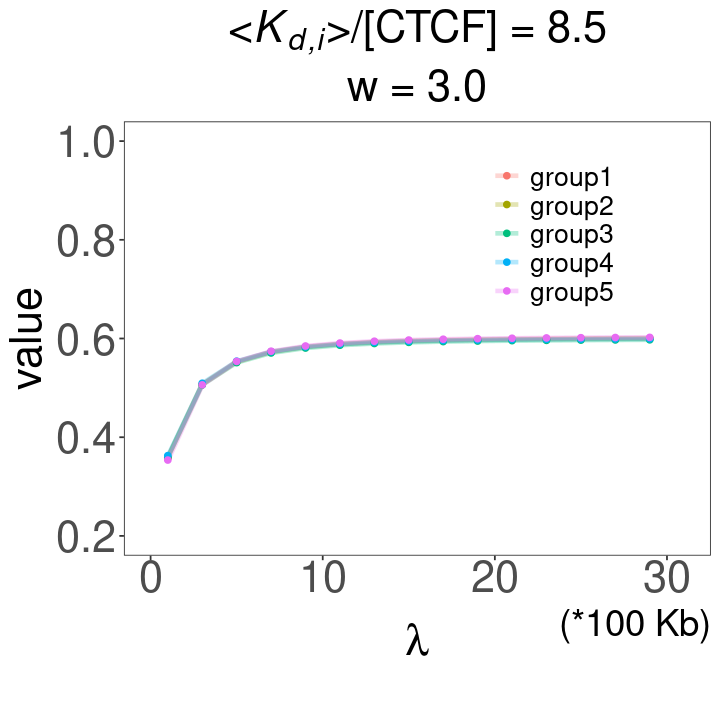

In [115]:
d = data.frame(cbind(seq(1,30,2),a))
colnames(d) = c('lambda','group1','group2','group3','group4','group5')
d = melt(d,id.vars='lambda')
ggplot(data=d, aes(x=lambda, y=value, group=variable, color=variable)) + 
ggtitle(expression(atop(paste('<',italic(K[paste('d',',','i')]),'>/[CTCF] = 8.5'),'w = 3.0')))+ 
  geom_line(size=1.3,alpha=0.3,position=position_dodge(width=0.05))+geom_point()+My_Theme+ylim(0.2,1) + xlim(0,31)+
  labs(x=expression(paste(lambda,)),caption="(*100 Kb)")

Loading required package: ggplot2



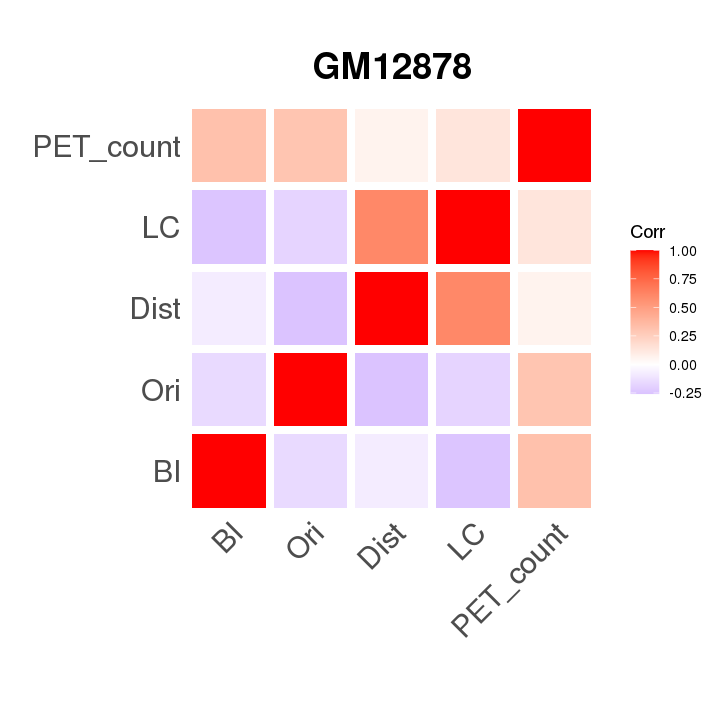

In [2]:
#df = df[df$label==1,]
library(ggcorrplot)
library(reshape2)
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=20, face="bold",hjust = 0.5),
  axis.title = element_text(size = 22),
  axis.text.x = element_text(size = 18),
  axis.text.y = element_text(size = 18),
  legend.title = element_text(size = 16),
  legend.text = element_text(size = 14))

df$BI = df$p12
df$Ori = df$orientation
df$LC = df$CTCF_window
df$PET_count = log(df$count+1)
df$Dist = -df$distance
#M = df[,c('CTCF','Orientation','Distance','Loop_Competition','PET_count')]
M = df[,c('BI','Ori','Dist','LC','PET_count')]
options(repr.plot.width=6, repr.plot.height=6)
ggplot(melt(cor(M)), aes(Var1, Var2, fill=value)) +
  geom_tile(height=0.9, width=0.9) +
  scale_fill_gradient2(low="blue", mid="white", high="red") +
  theme_minimal() +
  coord_equal() +
  labs(x="",y="",fill="Corr") + ggtitle('GM12878') +
  theme(axis.text.x=element_text(size=18, angle=45, vjust=1, hjust=1, 
                                 margin=margin(-3,0,0,0)),
        axis.text.y=element_text(size=18, margin=margin(0,-3,0,0)),
        plot.title = element_text(size=22, face="bold",hjust = 0.5),
        panel.grid.major=element_blank()) 

In [4]:

library(ggplot2)

My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, face="bold",hjust = 0.5,margin = margin(t = 10, b = -75)),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 26,margin = margin(t = 0, r = 0, b = 10, l = 10)),
  axis.text.y = element_text(size = 26),
  plot.caption = element_text(size = 22, vjust = 9),
  legend.title = element_text(size = 16),
  legend.text = element_text(size = 14),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())

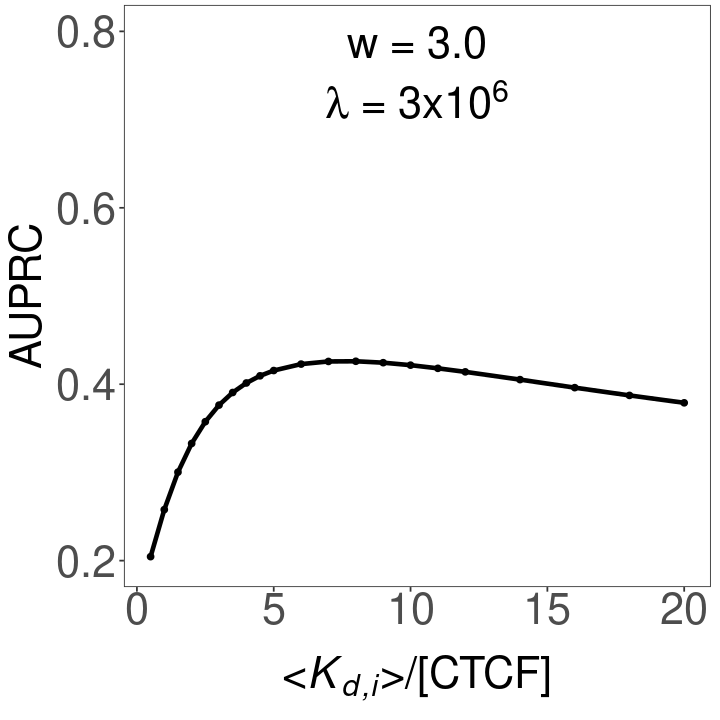

In [5]:
require(PRROC)
kd = c(0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,14.0,16.0,18.0,20.0)
pr_array = c(0.2709,0.3467,0.4049,0.4499,0.4851,0.5127,0.5345,0.5516,0.5649,0.5753,0.5892,0.5966,0.5997,0.5998,0.5980,0.5948,0.5907,0.5811,0.5707,0.5603,0.5502)
pr_array = c(0.2045,0.2578,0.3003,0.3328,0.3575,0.3763,0.3906,0.4014,0.4095,0.4155,0.4228,0.4258,0.4260,0.4244,0.4216,0.4180,0.4140,0.4052,0.3961,0.3873,0.3789)
d = data.frame(cbind(kd,pr_array))
colnames(d) = c('Kd','AUPRC')
#print(d)
options(repr.plot.width=6, repr.plot.height=6)
ggplot(data=d, aes(x= Kd, y=AUPRC, group=1)) + ggtitle(expression(atop("w = 3.0",paste(lambda," = 3x",10^6))))+
  geom_line(size=1.3)+geom_point()+My_Theme+ylim(0.2,0.8)+
  labs(x=expression(paste('<',italic(K[paste('d',',','i')]),'>/[CTCF]')))

     w     AUPRC
1  1.0 0.2307581
2  1.5 0.3682416
3  2.0 0.4138720
4  2.5 0.4253174
5  3.0 0.4260990
6  3.5 0.4235055
7  4.0 0.4199937
8  4.5 0.4164340
9  5.0 0.4131236
10 5.5 0.4101531
11 6.0 0.4075221
12 6.5 0.4052012
13 7.0 0.4031547
14 7.5 0.4013456
15 8.0 0.3997408


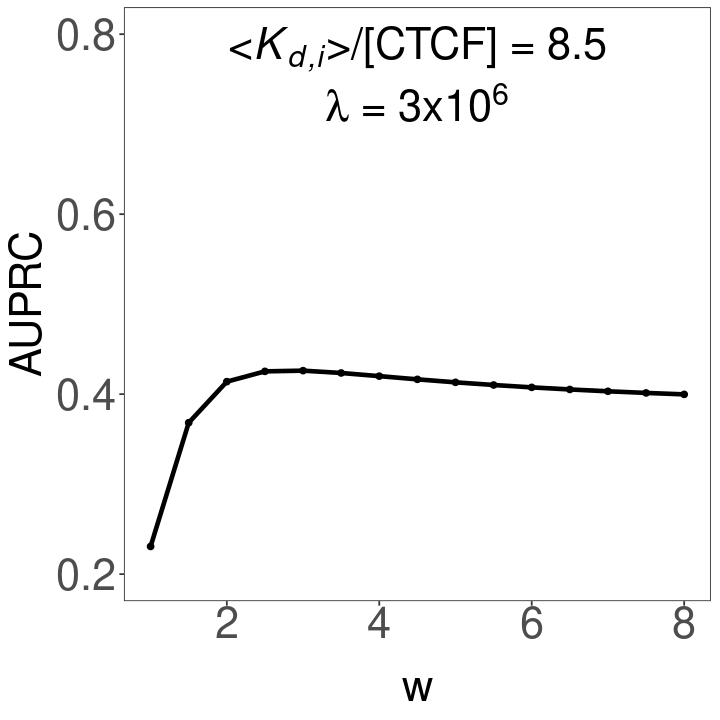

In [6]:
require(PRROC)
pr_array = c()
kd = 123.9*8.5
df$processivity = exp(-df$distance/(30*100000))

for(l in seq(1,8,0.5)){
    df$ori = l^((df$strand1-df$strand2-2)/2)
    df$p1 = df$height1/(df$height1+kd)
    df$p2 = df$height2/(df$height2+kd)
    df$p12 = df$p1*df$p2*df$ori
    fg <- (df$p12*df$CTCF_window*df$processivity)[df$label == 1]
    bg <- (df$p12*df$CTCF_window*df$processivity)[df$label == 0]
    pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
    pr_array = c(pr_array,(pr$auc.integral))
}

d = data.frame(cbind(seq(1,8,0.5),pr_array))
colnames(d) = c('w','AUPRC')
print(d)
ggplot(data=d, aes(x= w, y=AUPRC, group=1)) + 
ggtitle(expression(atop(paste('<',italic(K[paste('d',',','i')]),'>/[CTCF] = 8.5'),paste(lambda,' = 3x',10^6))))+ 
geom_line(size=1.3)+geom_point()+My_Theme+ylim(0.2,0.8)

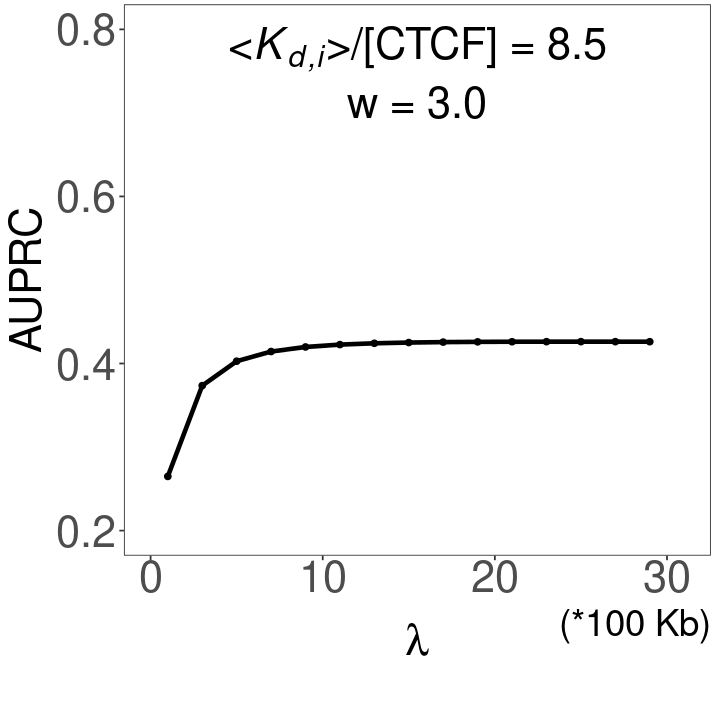

In [7]:
require(PRROC)
kd = 123.8*8.5
df$p1 = df$height1/(df$height1+kd)
df$p2 = df$height2/(df$height2+kd)
df$ori = 3^((df$strand1-df$strand2-2)/2)
df$p12 = df$p1*df$p2*df$ori

pr_array = c()
for(lambda in seq(1,30,2)){
    df$processivity = exp(-df$distance/(lambda*100000))
    fg <- (df$processivity*df$p12*df$CTCF_window)[df$label == 1]
    bg <- (df$processivity*df$p12*df$CTCF_window)[df$label == 0]
    pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
    pr_array = c(pr_array,(pr$auc.integral))
}

d = data.frame(cbind(seq(1,30,2),pr_array))
colnames(d) = c('lambda','AUPRC')
#print(d)
ggplot(data=d, aes(x= lambda, y=AUPRC, group=1)) + 
ggtitle(expression(atop(paste('<',italic(K[paste('d',',','i')]),'>/[CTCF] = 8.5'),'w = 3.0')))+ 
  geom_line(size=1.3)+geom_point()+My_Theme+ylim(0.2,0.8) + xlim(0,31)+
  labs(x=expression(paste(lambda,)),caption="(*100 Kb)")

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


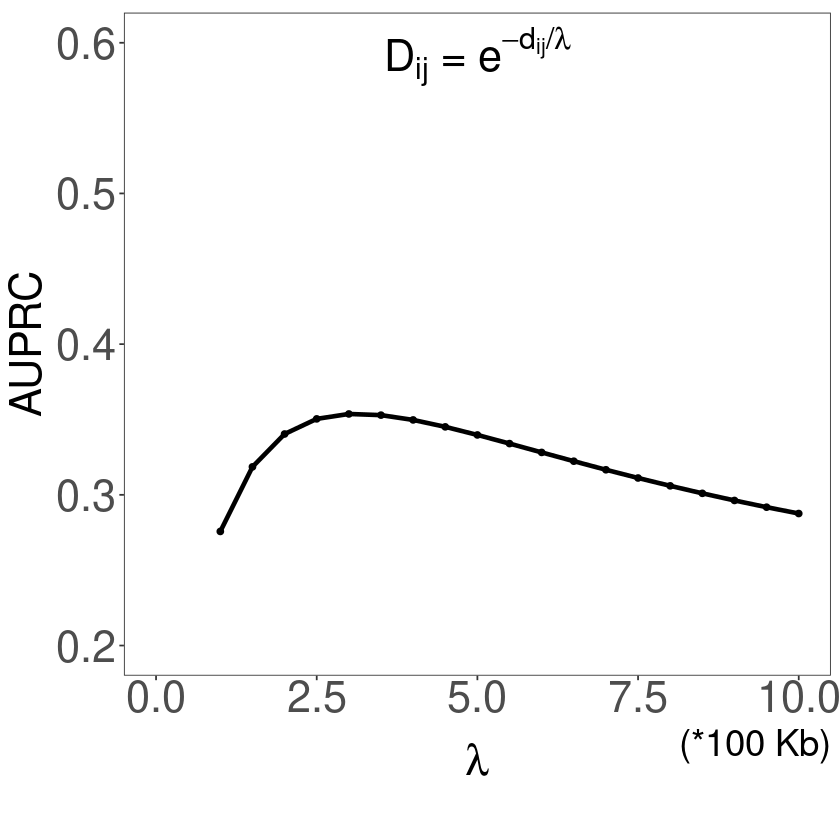

In [84]:
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, face="bold",hjust = 0.5,margin = margin(t = 10, b = -50)),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 26,margin = margin(t = 0, r = 0, b = 10, l = 10)),
  axis.text.y = element_text(size = 26),
  plot.caption = element_text(size = 22, vjust = 9),
  legend.title = element_text(size = 16),
  legend.text = element_text(size = 14),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())

require(PRROC)
kd = 123.9*8.5
df$p1 = df$height1/(df$height1+kd)
df$p2 = df$height2/(df$height2+kd)
df$ori = 3^((df$strand1-df$strand2-2)/2)
df$p12 = df$p1*df$p2*df$ori

pr_array = c()
for(lambda in seq(0.5,10,0.5)){
    df$processivity = exp(-df$distance/(lambda*100000))
    fg <- (df$processivity*df$p12)[df$label == 1]
    bg <- (df$processivity*df$p12)[df$label == 0]
    pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
    pr_array = c(pr_array,(pr$auc.integral))
}

d = data.frame(cbind(seq(0.5,10,0.5),pr_array))
colnames(d) = c('lambda','AUPRC')
#print(d)
ggplot(data=d, aes(x= lambda, y=AUPRC, group=1)) + ggtitle(expression(paste(D[ij]," = e"^-{paste(d[ij],"/",lambda)}))) +
  geom_line(size=1.3)+geom_point()+My_Theme+ylim(0.2,0.6) + xlim(0,10)+
  labs(x=expression(paste(lambda,)),caption="(*100 Kb)")

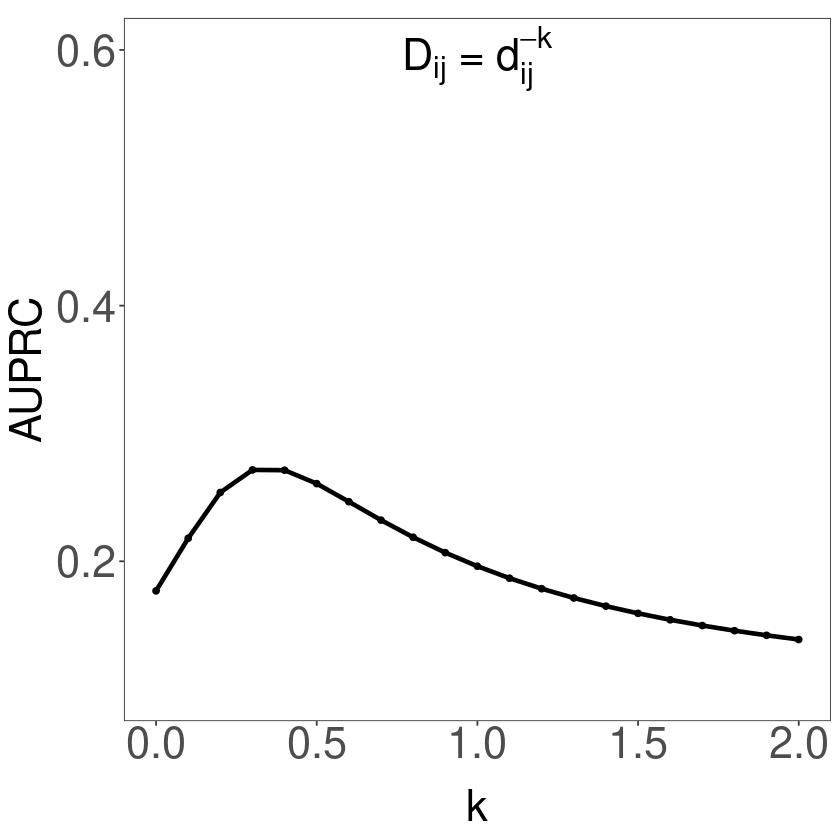

In [86]:
require(PRROC)
kd = 123.9*8.5
df$p1 = df$height1/(df$height1+kd)
df$p2 = df$height2/(df$height2+kd)
df$ori = 3^((df$strand1-df$strand2-2)/2)
df$p12 = df$p1*df$p2*df$ori

pr_array = c()
for(k in seq(0,2,0.1)){
    df$processivity = df$distance^(-k)
    fg <- (df$processivity*df$p12)[df$label == 1]
    bg <- (df$processivity*df$p12)[df$label == 0]
    pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
    pr_array = c(pr_array,(pr$auc.integral))
}

d = data.frame(cbind(seq(0,2,0.1),pr_array))
colnames(d) = c('lambda','AUPRC')
#print(d)
ggplot(data=d, aes(x= lambda, y=AUPRC, group=1)) + ggtitle(expression(paste(D[ij]," = ",d[ij]^-{k}))) +
  geom_line(size=1.3)+geom_point()+My_Theme+ylim(0.1,0.6) + xlim(0,2)+
  labs(x=expression(k))

In [79]:
require(PRROC)
pr_array = c()

fg <- (df$p12)[df$label == 1]
bg <- (df$p12)[df$label == 0]
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
pr_array = c(pr_array,(pr$auc.integral))

fg <- (df$orientation)[df$label == 1]
bg <- (df$orientation)[df$label == 0]
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
pr_array = c(pr_array,(pr$auc.integral))

fg <- (df$processivity)[df$label == 1]
bg <- (df$processivity)[df$label == 0]
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
pr_array = c(pr_array,(pr$auc.integral))

fg <- (df$CTCF_window)[df$label == 1]
bg <- (df$CTCF_window)[df$label == 0]
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
pr_array = c(pr_array,(pr$auc.integral))

fg <- (df$p12*df$orientation)[df$label == 1]
bg <- (df$p12*df$orientation)[df$label == 0]
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
pr_array = c(pr_array,(pr$auc.integral))

fg <- (df$p12*df$orientation*df$processivity)[df$label == 1]
bg <- (df$p12*df$orientation*df$processivity)[df$label == 0]
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
pr_array = c(pr_array,(pr$auc.integral))

fg <- (df$p12*df$orientation*df$CTCF_window)[df$label == 1]
bg <- (df$p12*df$orientation*df$CTCF_window)[df$label == 0]
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
pr_array = c(pr_array,(pr$auc.integral))

fg <- (df$p12*df$orientation*df$processivity*df$CTCF_window)[df$label == 1]
bg <- (df$p12*df$orientation*df$processivity*df$CTCF_window)[df$label == 0]
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
pr_array = c(pr_array,(pr$auc.integral))

print(pr_array)

[1] 0.08828677 0.07576491 0.07836806 0.09665514 0.17722181 0.22084299 0.42340256
[8] 0.42599326


In [111]:
df_ml = read.table('GM12878/HeLa_Boosting_cv.txt',header=F)

In [112]:
std = apply(as.matrix(t(df_ml)), 1, function(x){1.96*sd(x)})
std = c(std,rev(std))

                  Model      Features AUPRC           s
1  Loop extrusion model            BI 0.088 0.004030013
2    Xgboost (50 trees)            BI 0.088 0.002663566
3  Loop extrusion model           Ori 0.071 0.001208932
4    Xgboost (50 trees)           Ori 0.073 0.001804076
5  Loop extrusion model          Dist 0.078 0.005390059
6    Xgboost (50 trees)          Dist 0.089 0.005824422
7  Loop extrusion model            LC 0.097 0.009583400
8    Xgboost (50 trees)            LC 0.100 0.010240049
9  Loop extrusion model       BI\nOri 0.177 0.010240049
10   Xgboost (50 trees)       BI\nOri 0.176 0.009583400
11 Loop extrusion model BI\nOri\nDist 0.221 0.005824422
12   Xgboost (50 trees) BI\nOri\nDist 0.369 0.005390059
13 Loop extrusion model   BI\nOri\nLC 0.423 0.001804076
14   Xgboost (50 trees)   BI\nOri\nLC 0.424 0.001208932
15 Loop extrusion model           All 0.426 0.002663566
16   Xgboost (50 trees)           All 0.435 0.004030013


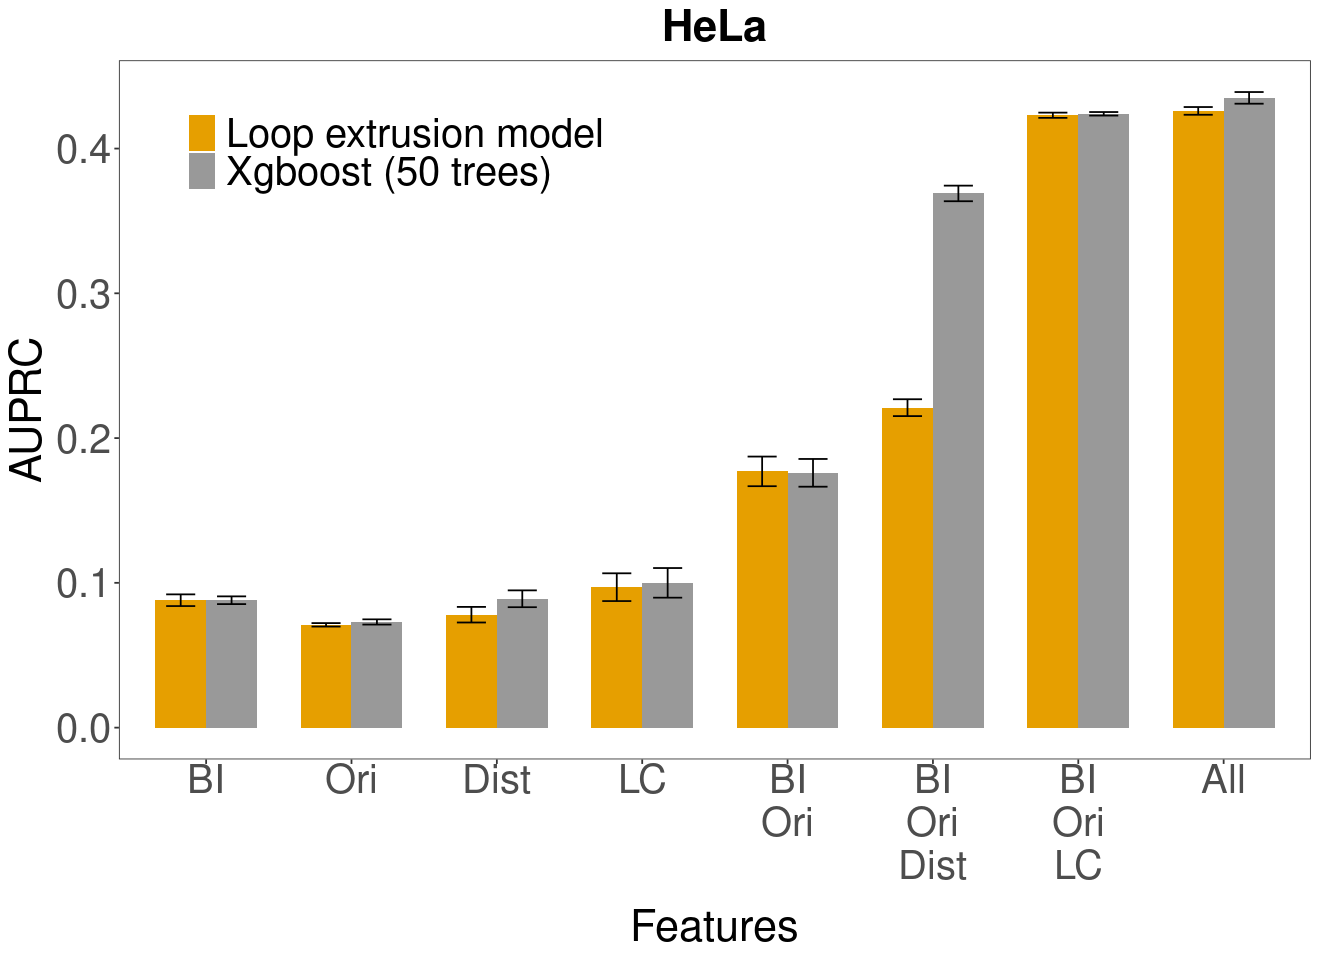

In [113]:
library(ggplot2)
library(reshape2)

My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, face="bold",hjust = 0.5),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 24,margin = margin(t = 0, r = 0, b = 10, l = 10)),
  axis.text.y = element_text(size = 24),
  legend.text = element_text(size = 24), 
  legend.position = c(.05, .95),
  legend.justification = c("left", "top"),
  legend.title=element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())

addline_format <- function(x,...){
    gsub('\\s','\n',x)
}

#pr_array = c(0.155,0.105,0.109,0.140,0.290,0.345,0.601,0.600)
#pr_ml = c(0.157,0.108,0.124,0.144,0.293,0.512,0.602,0.611)
pr_array = c(0.088,0.071,0.078,0.097,0.177,0.221,0.423,0.426)
pr_ml = c(0.088,0.073,0.089,0.1,0.176,0.369,0.424,0.435)
pr = rbind(pr_array,pr_ml)
rownames(pr) = c('Loop extrusion model','Xgboost (50 trees)')
#colnames(pr) = c('CTCF','Orientation','Distance','Loop Competition','CTCF+Orientation','CTCF+Orientation+Distance',
#                 'CTCF+Orientation+Loop Competition','All')
colnames(pr) = addline_format(c('BI','Ori','Dist','LC','BI Ori','BI Ori Dist','BI Ori LC','All'))
pr = melt(pr)
pr = cbind(pr,std = std)
colnames(pr) = c('Model','Features','AUPRC','s')
print(pr)
options(repr.plot.width=11, repr.plot.height=8)
ggplot(pr, aes(x = Features, y = AUPRC, fill = Model)) + ggtitle('HeLa') +
    geom_bar(stat="identity", position=position_dodge(),width=0.7) + My_Theme + scale_fill_manual(values=c("#E69F00","#999999"))+
    geom_errorbar(aes(ymin=AUPRC-s, ymax=AUPRC+s), width=.4, position=position_dodge(0.7))


     Model       Metrics Accuracy          std
1       LE GM12878 AUROC    0.968 3.357826e-04
2 Lollipop GM12878 AUROC    0.970 5.000000e-03
3       LE GM12878 AUPRC    0.852 1.872809e-03
4 Lollipop GM12878 AUPRC    0.860 1.000000e-02
5       LE    HeLa AUROC    0.953 7.838440e-04
6 Lollipop    HeLa AUROC    0.970 7.000000e-03
7       LE    HeLa AUPRC    0.812 3.371267e-03
8 Lollipop    HeLa AUPRC    0.890 1.000000e-02


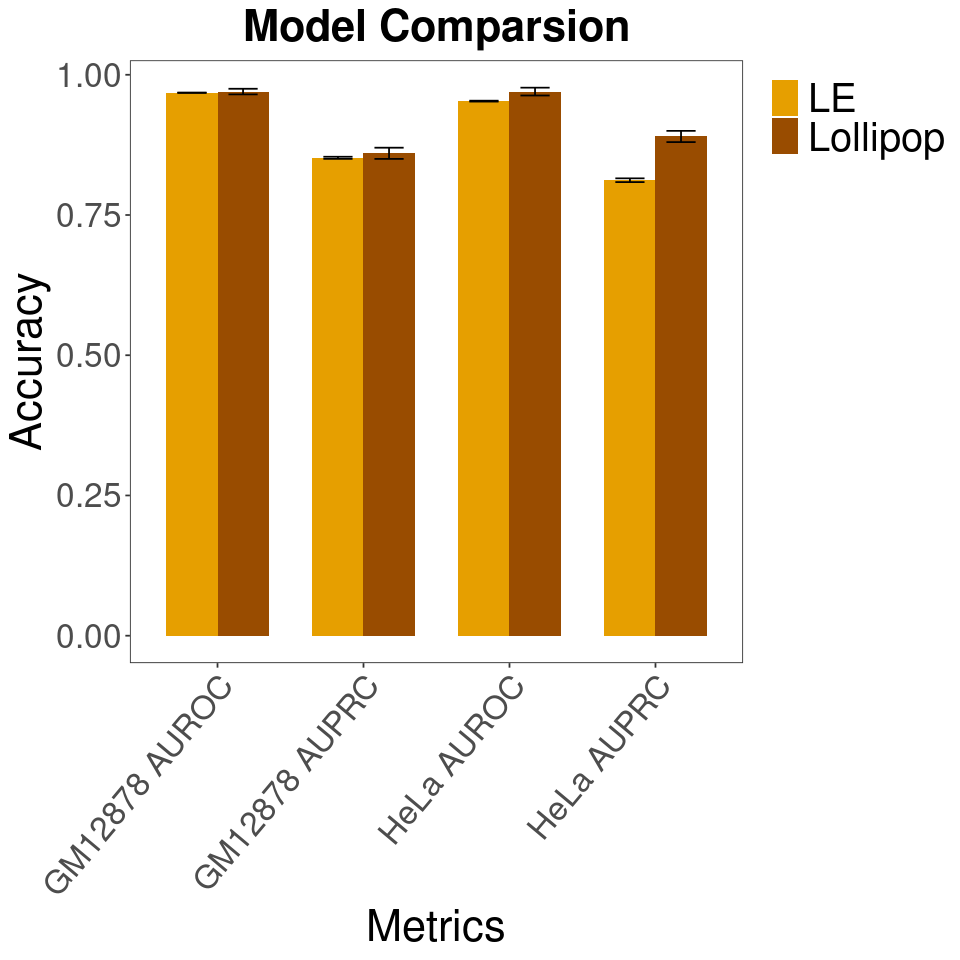

In [206]:
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, face="bold",hjust = 0.5),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 20,angle = 50,h=1),
  axis.text.y = element_text(size = 20),
  legend.text = element_text(size = 24), 
#  legend.position = c(.05, .95),
  legend.justification = c("left", "top"),
  legend.title=element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())

LE = c(0.968,0.852,0.953,0.812)
Lollipop = c(0.97,0.86,0.97,0.89)

per = rbind(LE,Lollipop)
colnames(per) = c('GM12878 AUROC','GM12878 AUPRC','HeLa AUROC','HeLa AUPRC')
per = melt(per)
std = c(3.35782625239749e-04,0.005,0.00187280852292911,0.01,7.83843997245256e-04,0.007,0.00337126703184803,0.01)
per = cbind(per,std=std)
colnames(per) = c('Model','Metrics','Accuracy','std')
print(per)
options(repr.plot.width=8, repr.plot.height=8)
ggplot(per, aes(x = Metrics, y = Accuracy, fill = Model)) + ggtitle('Model Comparsion') +
    geom_bar(stat="identity", position=position_dodge(),width=0.7) + My_Theme + scale_fill_manual(values=c("#E69F00","#994c00"))+
    geom_errorbar(aes(ymin=Accuracy-std, ymax=Accuracy+std), width=.4, position=position_dodge(0.7))


In [9]:
#df = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/GM12878/TF_E2_137_hg19_all_peak_pair_1M_CTCF_window.txt',header=TRUE))
df = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/HeLa/TF_E2_152_hg19_all_peak_pair_1M_CTCF_window.txt',header=TRUE))
df = df[df$label!=-1,]
df = df[df$motif1>0,]
df = df[df$motif2>0,]

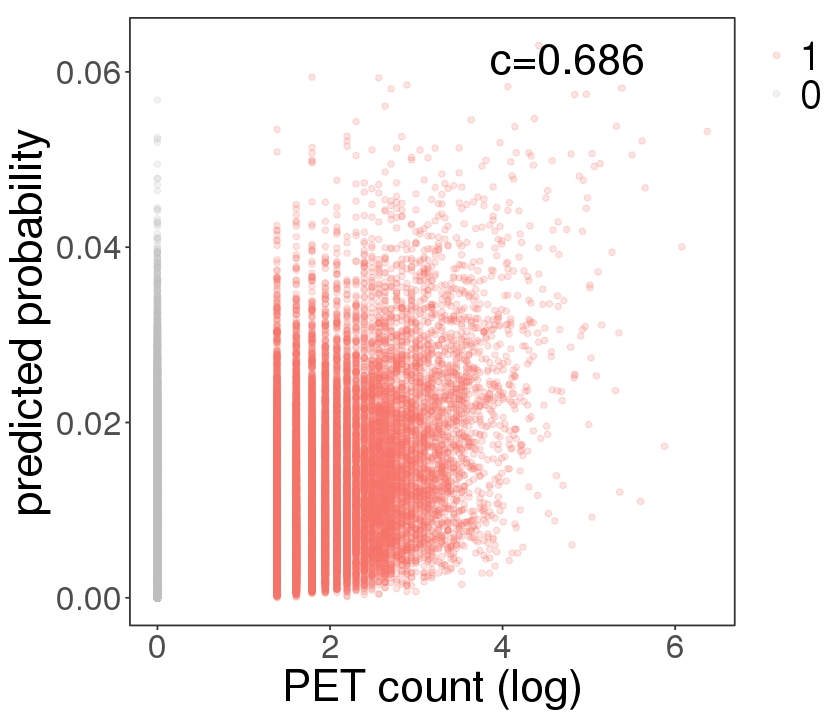

In [11]:
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, hjust = 0.8,margin = margin(t = 20, b = -40)),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 20),
  axis.text.y = element_text(size = 20),
  legend.text = element_text(size = 24), 
#  legend.position = c(.05, .95),
  legend.justification = c("left", "top"),
  legend.title=element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())

df$prediction = df$p12*df$orientation*df$CTCF_window
log_count = log(df$count+1)
df$label = as.factor(df$label)
options(repr.plot.width=7, repr.plot.height=6)
ggplot(df, aes(log_count,prediction,color=label))+ ggtitle('c=0.686') +
  geom_point(alpha = 0.2) + My_Theme + 
  scale_color_manual(values = c("#F8766D","#c0c0c0"), breaks = c('1','0')) +
  xlab('PET count (log)') + ylab('predicted probability') + 
  guides(fill = guide_legend(override.aes = list(alpha = 1))) 


In [12]:
cor(log_count,df$prediction)

[1] 0.5313522

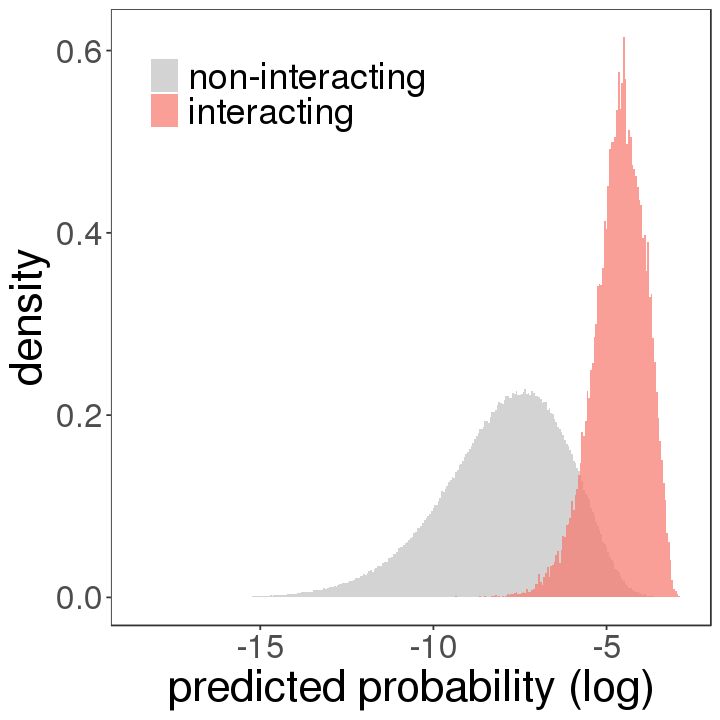

In [5]:
library(ggplot2)
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, hjust = 0.8,margin = margin(t = 20, b = -40)),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 20),
  axis.text.y = element_text(size = 20),
  legend.text = element_text(size = 22), 
  legend.position = c(.05, .95),
  legend.justification = c("left", "top"),
  legend.title=element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())

df$log_predicted_probability = log(df$p12*df$CTCF_window*df$orientation)
df1 = rbind(df[df$count>6,],df[df$count==0,])
options(repr.plot.width=6, repr.plot.height=6)
ggplot(df1, aes(log_predicted_probability, fill = label)) + 
    geom_histogram(alpha = 0.7, aes(y = ..density..),binwidth = 0.05, position = 'identity') +
    My_Theme + scale_fill_manual(values = c("#c0c0c0","#F8766D"), labels = c("non-interacting","interacting")) + 
    xlab('predicted probability (log)') +
    guides(fill = guide_legend(override.aes = list(alpha = 0.7))) 

In [35]:
#df = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/GM12878/TF_E2_137_hg19_all_peak_pair_1M_CTCF_window_waplko.txt',header=TRUE))

size = sum(df$label==1)
ctrl = df[df$label==1,]$distance
ori_ctrl = df[df$label==1,]$strand1-df[df$label==1,]$strand2

df$prob = df$p12*df$orientation*df$CTCF_window
df_s = df[order(-df$prob),]
s_0 = df_s[1:size,]$distance
ori_0 = df_s[1:size,]$strand1-df_s[1:size,]$strand2

df$prob = df$p12*df$orientation*df$CTCF_window_penetration_9
df_s = df[order(-df$prob),]
s_0.1 = df_s[1:size,]$distance
ori_0.1 = df_s[1:size,]$strand1-df_s[1:size,]$strand2

df$prob = df$p12*df$orientation*df$CTCF_window_penetration_6
df_s = df[order(-df$prob),]
s_0.4 = df_s[1:size,]$distance
ori_0.4 = df_s[1:size,]$strand1-df_s[1:size,]$strand2

df_d = cbind(ctrl,s_0,s_0.1,s_0.4)
colnames(df_d) = c('ctrl','0','0.1','0.4')
df_d = melt(df_d)
colnames(df_d) = c('id','penetration','distance')
df_d$orientation = c(ori_ctrl,ori_0,ori_0.1,ori_0.4)

In [25]:
df = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/GM12878/TF_E2_137_hg19_all_peak_pair_1M_CTCF_window_waplko.txt',header=TRUE))

In [26]:
df$pred = df$p12*df$orientation*df$CTCF_window
df2 = df[order(-df$pred),]
write.table(df2[1:55189,],'GM12878/TF_E2_137_hg19_all_peak_pair_1M_CTCF_window_top55189.txt',sep='\t')

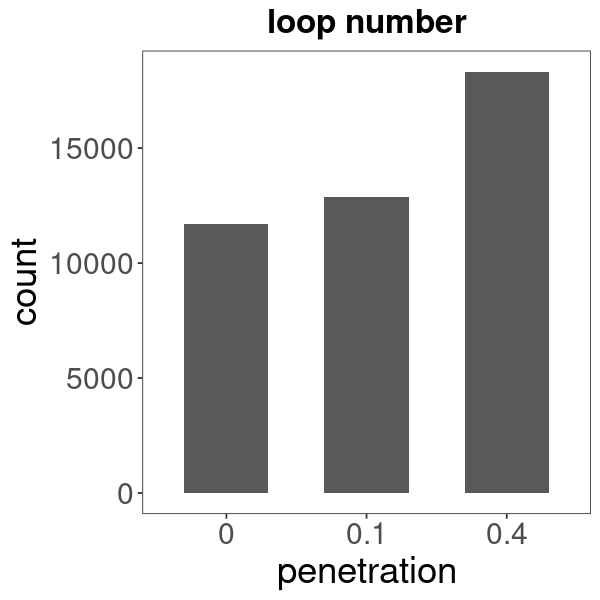

In [28]:
options(repr.plot.width=5, repr.plot.height=5)
library(reshape2)
library(ggplot2)
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=20, face="bold",hjust = 0.5),
  axis.title = element_text(size = 22),
  axis.text.x = element_text(size = 18),
  axis.text.y = element_text(size = 18),
  legend.title = element_text(size = 16),
  legend.text = element_text(size = 14), 
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())

n_0 = sum(df$p12*df$orientation*df$CTCF_window > 0.02)
n_1 = sum(df$p12*df$orientation*df$CTCF_window_penetration_9 > 0.02)
n_4 = sum(df$p12*df$orientation*df$CTCF_window_penetration_6 > 0.02)
n = data.frame(penetration = c('0','0.1','0.4'), count = c(n_0,n_1,n_4))
ggplot(data=n, aes(x=penetration, y=count)) + ggtitle('loop number') +
  geom_bar(stat="identity",width=0.6) + My_Theme


In [42]:
library(reshape2)
library(ggplot2)
size = sum(df$label==1)
ctrl = df[df$label==1,]$distance
ori_ctrl = df[df$label==1,]$strand1-df[df$label==1,]$strand2


df$prob = df$p12*df$orientation*df$CTCF_window
df_s = df[order(-df$prob),]
t_0 = df_s[1:size,]$distance
ori_0 = df_s[1:size,]$strand1-df_s[1:size,]$strand2

df$prob = df$p12*df$orientation*df$CTCF_window_penetration_9
df_s = df[order(-df$prob),]
t_1 = df_s[1:size,]$distance
ori_1 = df_s[1:size,]$strand1-df_s[1:size,]$strand2

df$prob = df$p12*df$orientation*df$CTCF_window_penetration_6
df_s = df[order(-df$prob),]
t_2 = df_s[1:size,]$distance
ori_2 = df_s[1:size,]$strand1-df_s[1:size,]$strand2


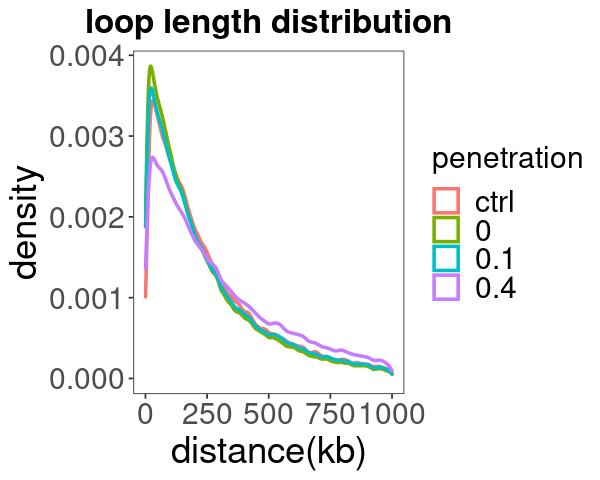

In [68]:
df_d = melt(cbind(ctrl,t_0,t_1,t_2)/1000)
colnames(df_d) = c('id','penetration','distance')
options(repr.plot.width=5, repr.plot.height=4)
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=20, face="bold",hjust = 0.5),
  axis.title = element_text(size = 22),
  axis.text.x = element_text(size = 18),
  axis.text.y = element_text(size = 18),
  legend.title = element_text(size = 18),
  legend.text = element_text(size = 18), 
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())
df_d$penetration = factor(df_d$penetration,levels=c("ctrl", "t_0",'t_1','t_2'))
library(plyr)
df_d$penetration = mapvalues(df_d$penetration, from = c("ctrl", "t_0",'t_1','t_2'), to = c('ctrl','0','0.1','0.4'))
ggplot(df_d, aes(distance, color = penetration)) + ggtitle('loop length distribution') + 
    geom_density(size=1,adjust = 0.5) + My_Theme +xlab('distance(kb)')


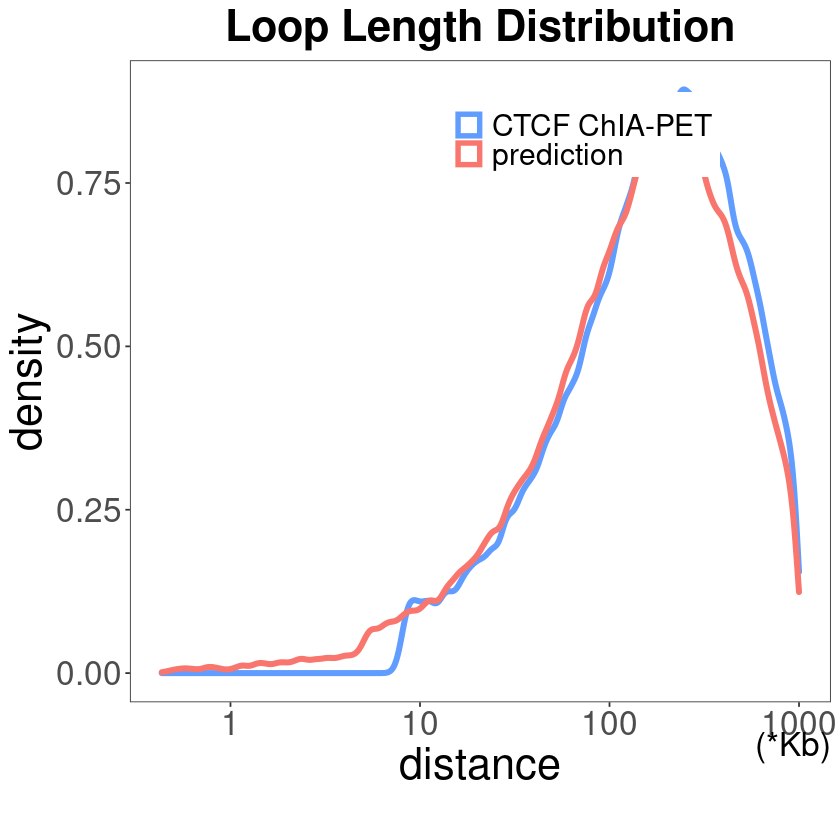

In [5]:
library(reshape2)
library(ggplot2)
size = sum(df$label==1)
ctrl = df[df$label==1,]$distance/1000

df$prob = df$p12*df$orientation*df$CTCF_window
df_s = df[order(-df$prob),]
prediction = df_s[1:size,]$distance/1000

df_d = melt(cbind(ctrl,prediction))
colnames(df_d) = c('id','type','distance')
#print(df_d)
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, face="bold",hjust = 0.5),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 20),
  axis.text.y = element_text(size = 20),
  plot.caption = element_text(size = 20, vjust = 9),
  legend.text = element_text(size = 18),
  legend.position = c(.45, .95),
  legend.justification = c("left", "top"),
  legend.title=element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())

ggplot(df_d, aes(distance, color = type)) + ggtitle('Loop Length Distribution') + 
    geom_density(size=1.7,adjust = 0.5) + My_Theme + 
    scale_x_continuous(trans = 'log10') +
    scale_color_manual(values = c("#619cff","#F8766D"), labels = c("CTCF ChIA-PET", "prediction")) +
    labs(x='distance',caption="(*Kb)")

    
      ctrl   t_0 t_0.1 t_0.3
  -2  1623     0     0     0
  0  18420 12759 11706  9255
  2  35146 42430 43483 45934


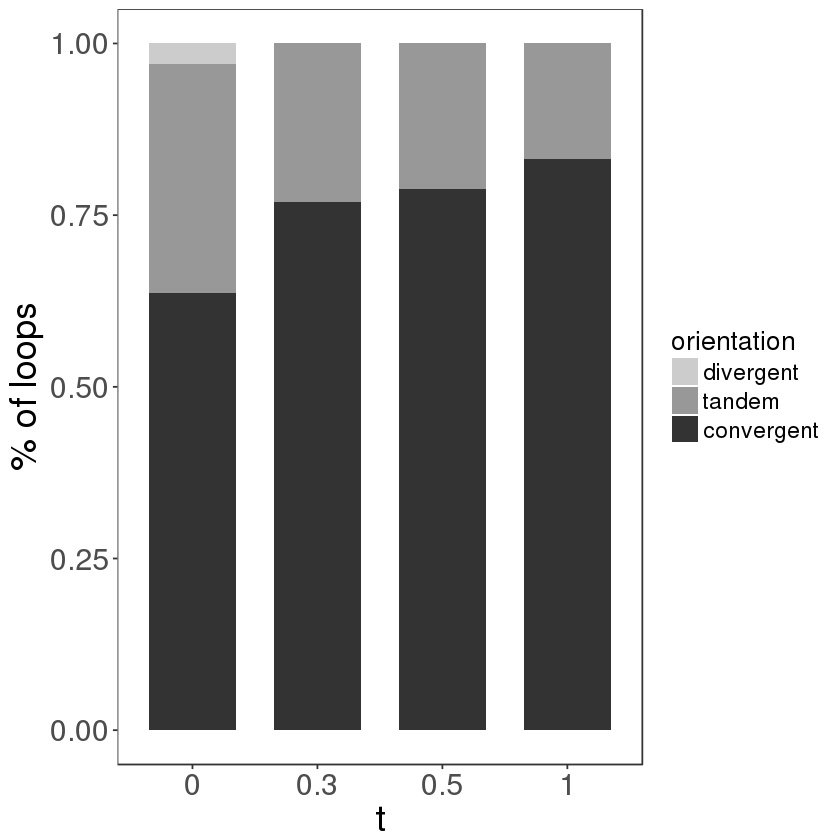

In [22]:
library(plyr)
df_o = table(df_d$orientation,df_d$type)
print(df_o)
rownames(df_o) = c('divergent','tandem','convergent')
df_o = melt(df_o)
colnames(df_o) = c('orientation','type','count')
df_o$orientation = factor(df_o$orientation)
ggplot(df_o, aes(x=type, y=count,fill=orientation)) + 
    geom_bar(position="fill", stat="identity",width=0.7) + My_Theme +
    scale_fill_grey(start=0.8, end=0.2) + xlab('t') + ylab('% of loops') +
    scale_x_discrete(labels = c("0", "0.3", "0.5", "1"))

In [195]:
df = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/HeLa/TF_E2_152_hg19_all_peak_pair_1M_CTCF_window.txt',header=TRUE))

In [196]:
auroc = c()
auprc = c()
for(i in 1:10){
    df_neg = df[df$label == 0,]
    df_neg = df_neg[sample(nrow(df_neg), sum(df$count > 3)*5),]
    fg <- (df$CTCF_window*df$p12*df$orientation)[df$count > 3]
    bg <- (df_neg$CTCF_window*df_neg$p12*df_neg$orientation)
    roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
    auroc = c(auroc,roc$auc)
    pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
    auprc = c(auprc, pr$auc.integral)
}

In [193]:
sd(auroc)*1.96
sd(auprc)*1.96

[1] 3.357826e-04

[1] 0.001872809

In [197]:
sd(auroc)*1.96
sd(auprc)*1.96


[1] 7.83844e-04

[1] 0.003371267

[1] 17787
[1] 88935    16


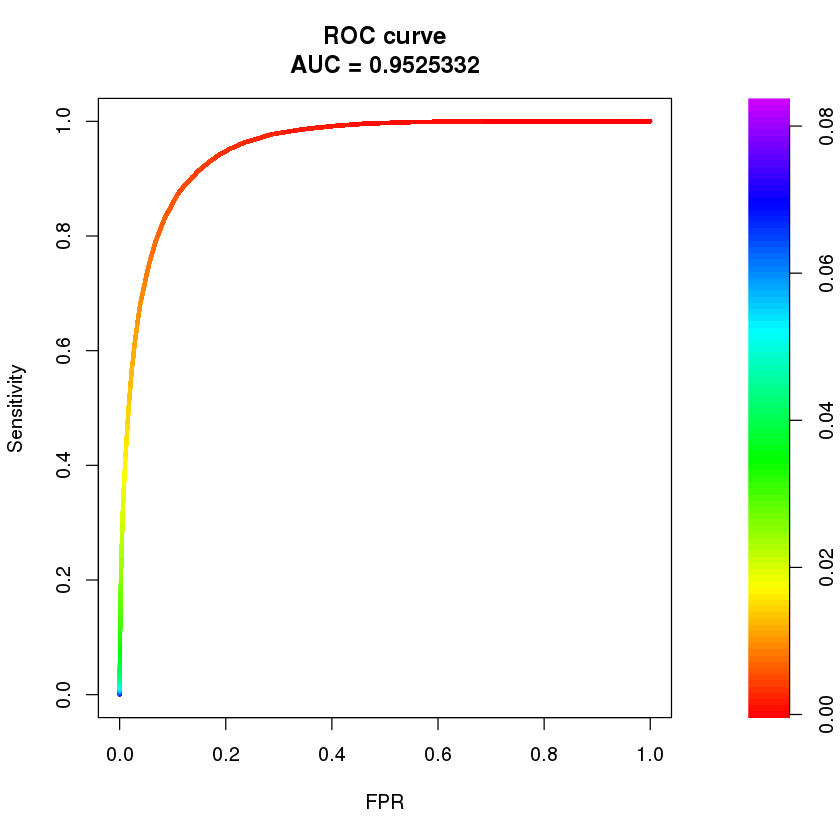

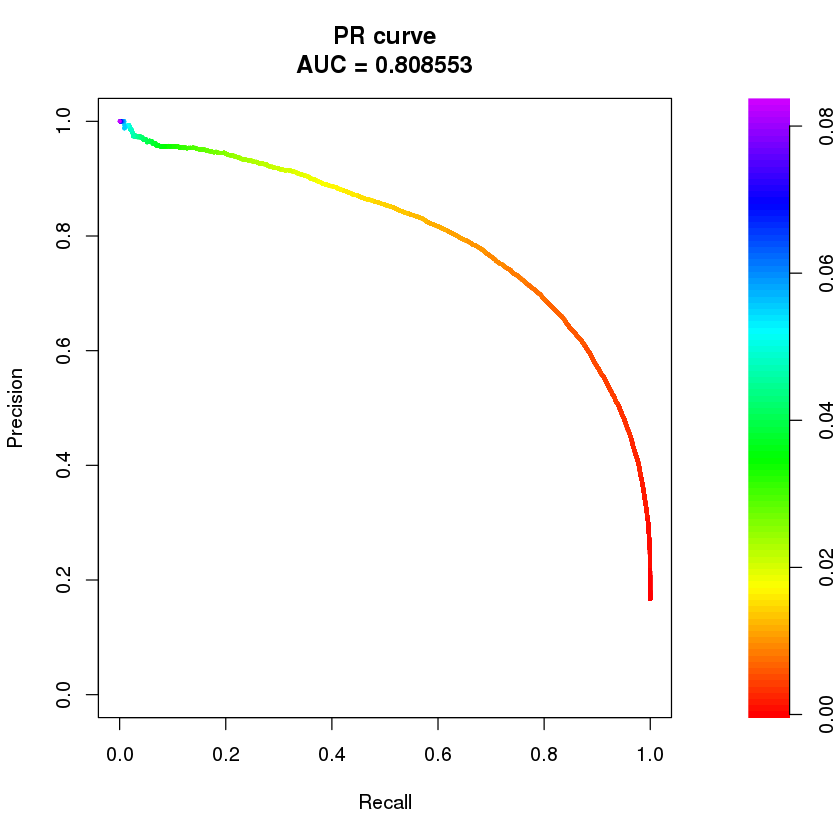

In [145]:
require(PRROC)
print(sum(df$count > 3))
#df_pos = df[df$label == 1,]
df_neg = df[df$label == 0,]
df_neg = df_neg[sample(nrow(df_neg), sum(df$count > 3)*5),]
print(dim(df_neg))
fg <- (df$CTCF_window*df$p12*df$orientation)[df$count > 3]
bg <- (df_neg$CTCF_window*df_neg$p12*df_neg$orientation)

# ROC Curve    
roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(roc)

# PR Curve
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(pr)

In [237]:
df = data.frame(read.table('/home/wxi1/Desktop/data/MicroC/loop_calling_reproduce/loops_rs1000_allchr/loop_extrusion/mESC_CTCF_mm10_all_peak_pair_1M_CTCF_window.txt',header=TRUE))

In [271]:
require(PRROC)

df_pos = df[df$label == 1,]
df_neg = df[df$label == 0,]
df_neg = df_neg[sample(nrow(df_neg), sum(df$label == 1)*5),]

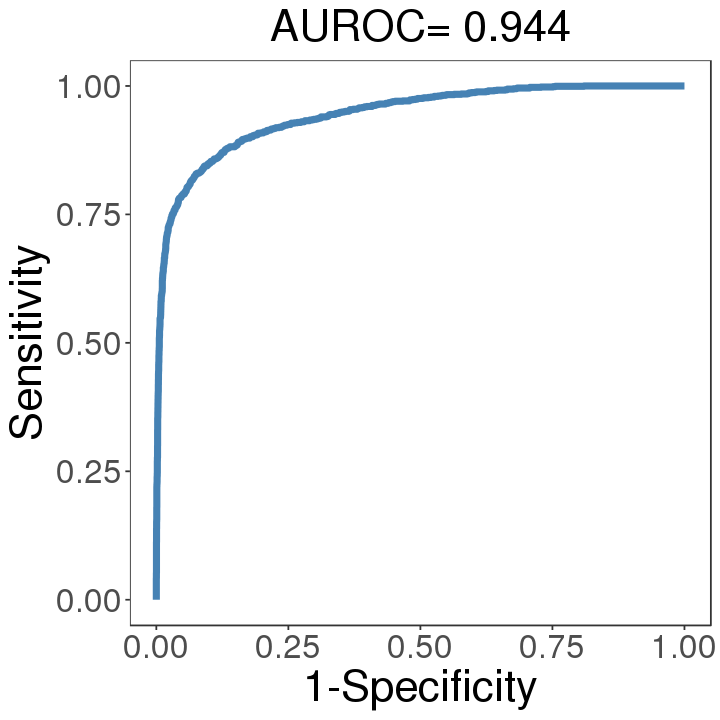

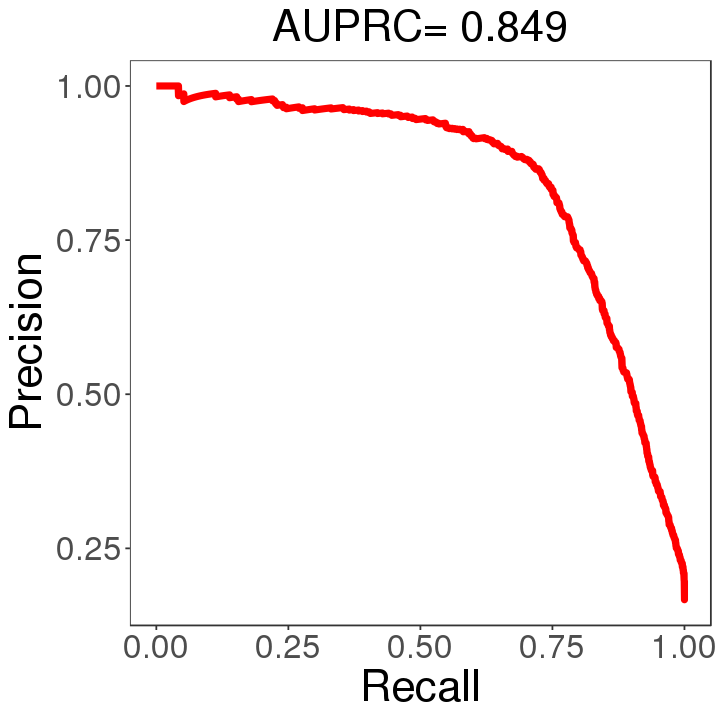

In [274]:
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, hjust = 0.5),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 20),
  axis.text.y = element_text(size = 20),
  legend.text = element_text(size = 22), 
  legend.position = c(.05, .85),
  legend.justification = c("left", "top"),
  legend.title=element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())

require(PRROC)
fg <- (df_pos$CTCF_window*df_pos$p12*df_pos$orientation)
bg <- (df_neg$CTCF_window*df_neg$p12*df_neg$orientation)
   
roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
ggplot(data.frame(roc$curve),aes(x=X1,y=X2)) + geom_line(size=2,color='steelblue') + My_Theme +
  ggtitle(paste("AUROC=",format(roc$auc,digits=3))) + 
  labs(x="1-Specificity",y="Sensitivity")

pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
ggplot(data.frame(pr$curve),aes(x=X1,y=X2)) + geom_line(size=2,color='red') + My_Theme +
  ggtitle(paste("AUPRC=",format(pr$auc.integral,digits=3))) + 
  labs(x="Recall",y="Precision")

In [12]:
#df = data.frame(read.table('/mnt/t/data1/wxi1/BingHiC/GM12878_loop_motif_peak_snp_disrupt_all_contact_all_cleaned.txt',header=TRUE))
df = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/BingHiC/GM12878_loop_motif_peak_snp_disrupt_all_contact_all_cleaned_mean.txt',header=TRUE))

In [13]:
df$ratio = df$all_weak_mean/df$all_strong_mean
print(max(df$ratio))
print(min(df$ratio))
print(sum(df$ratio>1))
b= matrix(0, 21, 21)
b[lower.tri(b, diag=FALSE)] <- df$ratio
b <- t(b)
print(df)

[1] 1.033933
[1] 0.9899013
[1] 172
     id all_strong_mean all_weak_mean     ratio
1     0       2.0679279     2.0653813 0.9987685
2     1       2.0669654     2.0615518 0.9973809
3     2       2.0027452     1.9970860 0.9971743
4     3       1.9148141     1.9031411 0.9939038
5     4       1.8084385     1.7939878 0.9920093
6     5       1.7146975     1.6973813 0.9899013
7     6       1.6351089     1.6239921 0.9932012
8     7       1.5018981     1.4970100 0.9967454
9     8       1.3750756     1.3747119 0.9997355
10    9       1.2754810     1.2791072 1.0028430
11   10       1.1792937     1.1883834 1.0077077
12   11       1.0711637     1.0856983 1.0135690
13   12       0.9736811     0.9988931 1.0258935
14   13       0.8604326     0.8842360 1.0276645
15   14       0.7844309     0.8045821 1.0256889
16   15       0.7150921     0.7305552 1.0216239
17   16       0.6385365     0.6529401 1.0225572
18   17       0.5742769     0.5909923 1.0291069
19   18       0.5298351     0.5464109 1.0312848
20   

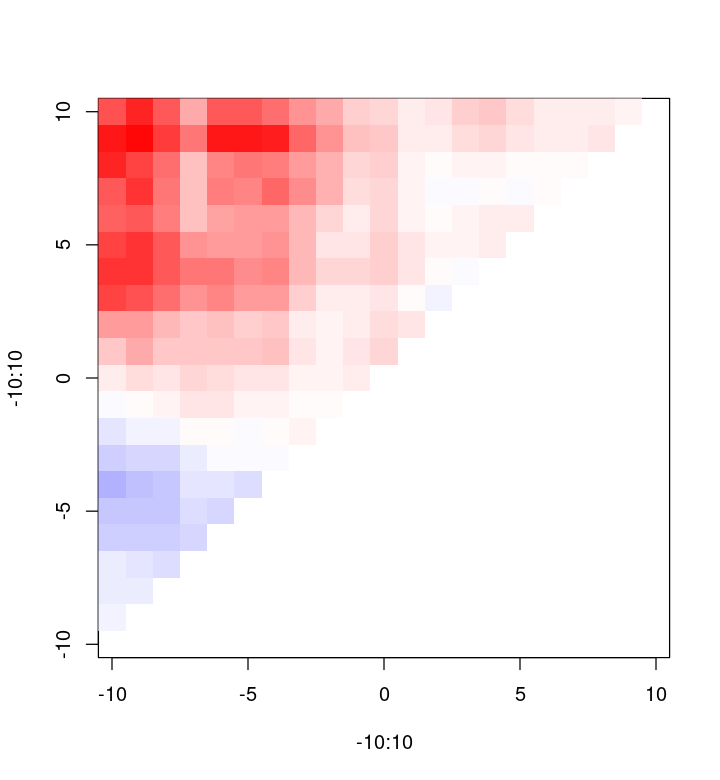

In [15]:
colfunc <- colorRampPalette(c("blue", "white", 'red'))
#png("/Users/xw/Desktop/image.png", width = 600, height = 600)
options(repr.plot.width=6, repr.plot.height=6.5)
image(-10:10,-10:10,b,breaks = seq(0.965,1.035,0.001),col = colfunc(70))
#image(-10:10,-10:10,b1,breaks = seq(0.95,1.05,0.001),col = colfunc(100))
#dev.off()

In [2]:
df = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/BingHiC/Interaction_freq_ratio_all.txt',header=F))


[1] 1.1322

[1] 0.5898

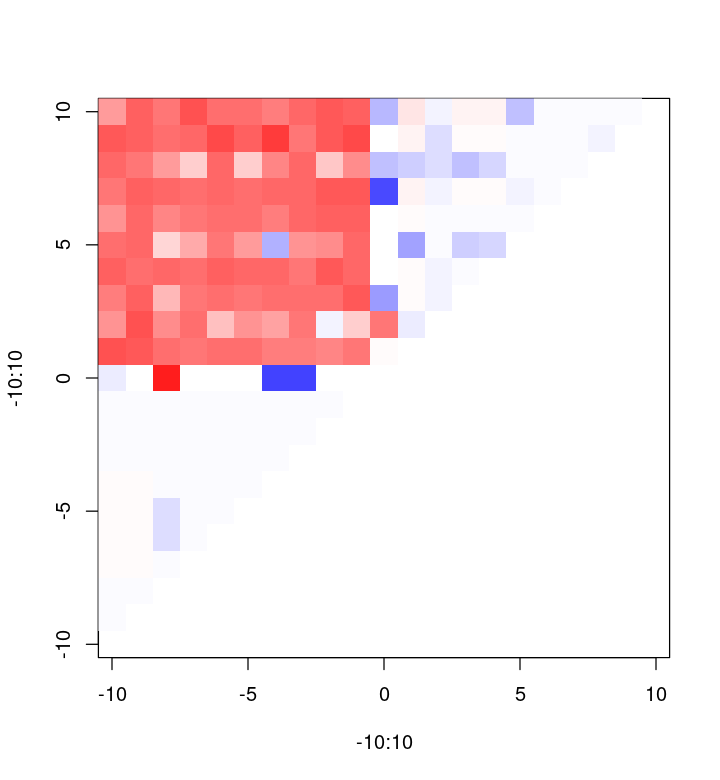

In [9]:
b= matrix(0, 21, 21)
b[lower.tri(b, diag=FALSE)] <- (df$V1-1)/5+1
b <- t(b)
b[1:10,11] = rnorm(10, mean=1, sd=0.04)
b[11,12:21] = rnorm(10, mean=1, sd=0.04)
colfunc <- colorRampPalette(c("blue", "white", 'red'))
#png("/Users/xw/Desktop/image.png", width = 600, height = 600)
options(repr.plot.width=6, repr.plot.height=6.5)
#image(-10:10,-10:10,b,breaks = seq(0.5,1.3,0.01),col = colfunc(100))
image(-10:10,-10:10,b,breaks = seq(0.965,1.035,0.001),col = colfunc(70))
max(df$V1)
min(df$V1)
#dev.off()

In [4]:
b= matrix(0, 21, 21)
b[lower.tri(b, diag=FALSE)] <- 0
b <- t(b)
b[1:10,11] = 1.035
b[11,12:21] = 1.035

colfunc <- colorRampPalette(c("grey", "white", 'grey'))
#png("/Users/xw/Desktop/image.png", width = 600, height = 600)
options(repr.plot.width=6, repr.plot.height=6.5)
#image(-10:10,-10:10,b,breaks = seq(0.5,1.3,0.01),col = colfunc(100))
#File <- "/Users/xw/Desktop/test.svg"
#setwd("/Users/xw/Desktop")
svg(filename = "test.svg")
image(-10:10,-10:10,b,breaks = seq(0.965,1.035,0.001),col = colfunc(70))
dev.off()
#ggsave(file="/Users/xw/Desktop/test.svg", plot=image)

png 
  2

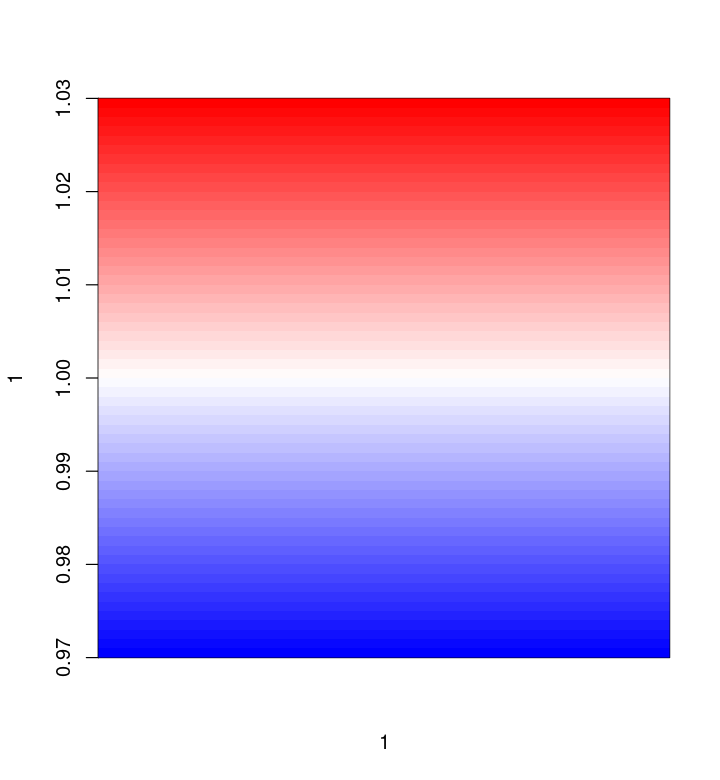

In [23]:
image.scale <- function(z, zlim, col = heat.colors(12),breaks, horiz=TRUE, ylim=NULL, xlim=NULL, ...){
 if(!missing(breaks)){
  if(length(breaks) != (length(col)+1)){stop("must have one more break than colour")}
 }
 if(missing(breaks) & !missing(zlim)){
  breaks <- seq(zlim[1], zlim[2], length.out=(length(col)+1)) 
 }
 if(missing(breaks) & missing(zlim)){
  zlim <- range(z, na.rm=TRUE)
  zlim[2] <- zlim[2]+c(zlim[2]-zlim[1])*(1E-3)#adds a bit to the range in both directions
  zlim[1] <- zlim[1]-c(zlim[2]-zlim[1])*(1E-3)
  breaks <- seq(zlim[1], zlim[2], length.out=(length(col)+1))
 }
 poly <- vector(mode="list", length(col))
 for(i in seq(poly)){
  poly[[i]] <- c(breaks[i], breaks[i+1], breaks[i+1], breaks[i])
 }
 xaxt <- ifelse(horiz, "s", "n")
 yaxt <- ifelse(horiz, "n", "s")
 if(horiz){YLIM<-c(0,1); XLIM<-range(breaks)}
 if(!horiz){YLIM<-range(breaks); XLIM<-c(0,1)}
 if(missing(xlim)) xlim=XLIM
 if(missing(ylim)) ylim=YLIM
 plot(1,1,t="n",ylim=ylim, xlim=xlim, xaxt=xaxt, yaxt=yaxt, xaxs="i", yaxs="i", ...)  
 for(i in seq(poly)){
  if(horiz){
   polygon(poly[[i]], c(0,0,1,1), col=col[i], border=NA)
  }
  if(!horiz){
   polygon(c(0,0,1,1), poly[[i]], col=col[i], border=NA)
  }
 }
}
image.scale(volcano, col=colfunc(60), breaks=seq(0.97,1.03,0.001), horiz=F)

In [10]:
to.upper<-function(X) X[upper.tri(X,diag=TRUE)]
cross = array(b[2:11,12:21])
off = c(to.upper(b[1:10,1:10]),to.upper(b[12:21,12:21]))
off = off[off!=0]
on =  c(b[1:10,11],t(b[11,12:21]))

In [11]:

print(sum(cross>1))
#print(sum(cross2>1))
print(sum(on>1))
print(sum(off>1))
#print(sum(off2>1))

[1] 92
[1] 6
[1] 20


Warning message:
“Removed 18 rows containing non-finite values (stat_density).”
Warning message:
“Removed 1 rows containing missing values (geom_vline).”


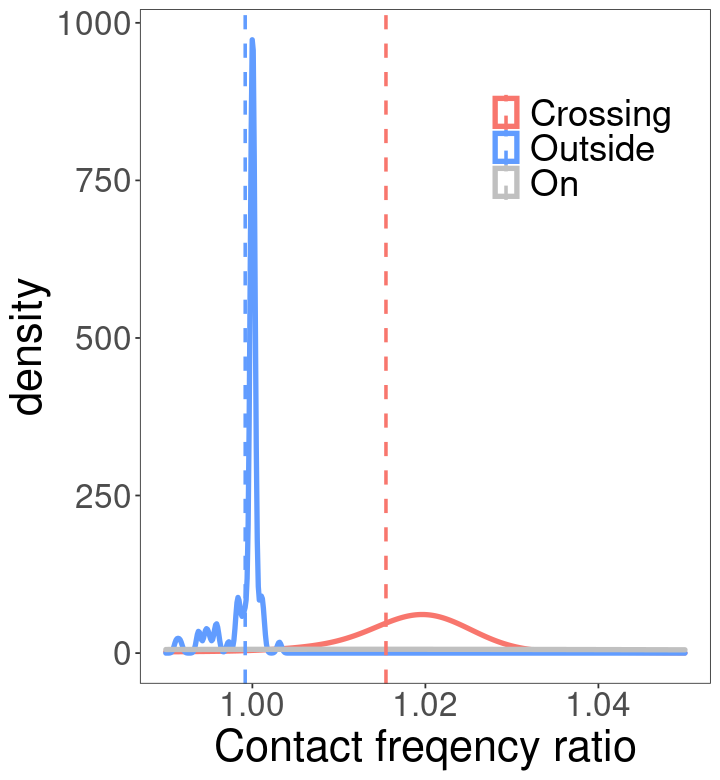

In [22]:
library(ggplot2)
d= data.frame(ratio=c(cross,off,on))

d$category = c(rep('Crossing',length(cross)),rep('Outside',length(off)),rep('On',length(on)))
d$category = factor(d$category, levels = c('Crossing','Outside','On'))
#print(d)
library(ggplot2)
library(plyr)
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, hjust = 0.5),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 20),
  axis.text.y = element_text(size = 20),
  legend.text = element_text(size = 22), 
  legend.position = c(.6, .9),
  legend.justification = c("left", "top"),
  legend.title=element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())

cd <- ddply(d, "category", summarise, ratio.mean=mean(ratio))
ggplot(d, aes(ratio, color = category)) + 
    geom_density(size=1.5,adjust = 5) + scale_color_manual(values = c("#F8766D",'#619cff',"#c0c0c0")) +
#    geom_histogram(binwidth=.005, alpha=.05, position="identity") + scale_fill_manual(values = c("#F8766D",'#619cff',"#c0c0c0")) +
    My_Theme + xlab('Contact freqency ratio') + xlim(0.99,1.05) +
    geom_vline(data=cd, aes(xintercept=ratio.mean,  color=category),
               linetype="dashed", size=1)

Warning message:
“Removed 2 rows containing non-finite values (stat_density).”


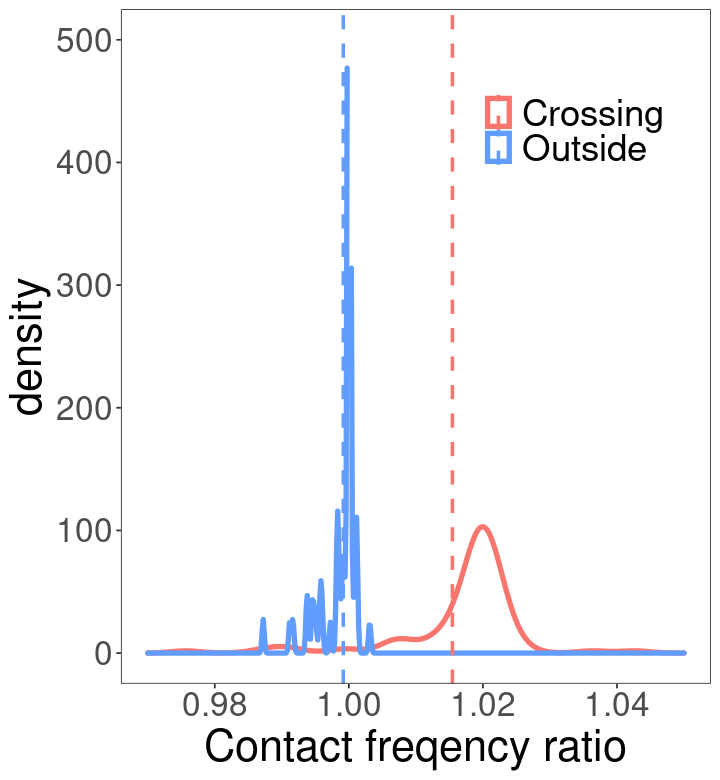

In [79]:
library(ggplot2)
d= data.frame(ratio=c(cross,off))

d$category = c(rep('Crossing',length(cross)),rep('Outside',length(off)))
d$category = factor(d$category, levels = c('Crossing','Outside'))
#print(d)
library(ggplot2)
library(plyr)
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, hjust = 0.5),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 20),
  axis.text.y = element_text(size = 20),
  legend.text = element_text(size = 22), 
  legend.position = c(.6, .9),
  legend.justification = c("left", "top"),
  legend.title=element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())

cd <- ddply(d, "category", summarise, ratio.mean=mean(ratio))
ggplot(d, aes(ratio, color = category)) + 
    geom_density(size=1.5,adjust = 2) + scale_color_manual(values = c("#F8766D",'#619cff')) +
#    geom_histogram(binwidth=.005, alpha=.05, position="identity") + scale_fill_manual(values = c("#F8766D",'#619cff',"#c0c0c0")) +
    My_Theme + xlab('Contact freqency ratio') + xlim(0.97,1.05) + ylim(0,500) + 
    geom_vline(data=cd, aes(xintercept=ratio.mean,  color=category),
               linetype="dashed", size=1)

In [2]:
df = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/Knockout/Aiden_Cell_2017/compareTF/union_HCT116_CTCF_untreated_HCT116_CTCF_treated_hg19_all_scores.out',header=F))


In [1]:
df1 = data.frame(read.table('overlap_loop/TF_E2_137_hg19_300_sorted.bed',header=F))
df2 = data.frame(read.table('overlap_loop/TF_E2_152_hg19_300_sorted.bed',header=F))
GM_mean = mean(df1$V4)
He_mean = mean(df2$V4)
print(GM_mean)
print(He_mean)

[1] 123.9285
[1] 70.80812


In [56]:
df = data.frame(read.table('overlap_loop/HeLa_CTCF_PET_clusters_sorted_CTCF_signal_normalized_top10k_NOT_GM12878.txt',header=F))
#df = data.frame(read.table('overlap_loop/GM12878_CTCF_PET_clusters_sorted_CTCF_signal_normalized_top10k_AND_HeLa.txt',header=F))
colnames(df) = c('chr1','start1','end1','chr2','start2','end2','count','GM_anchor1','GM_anchor2','GM_window','He_anchor1','He_anchor2','He_window')


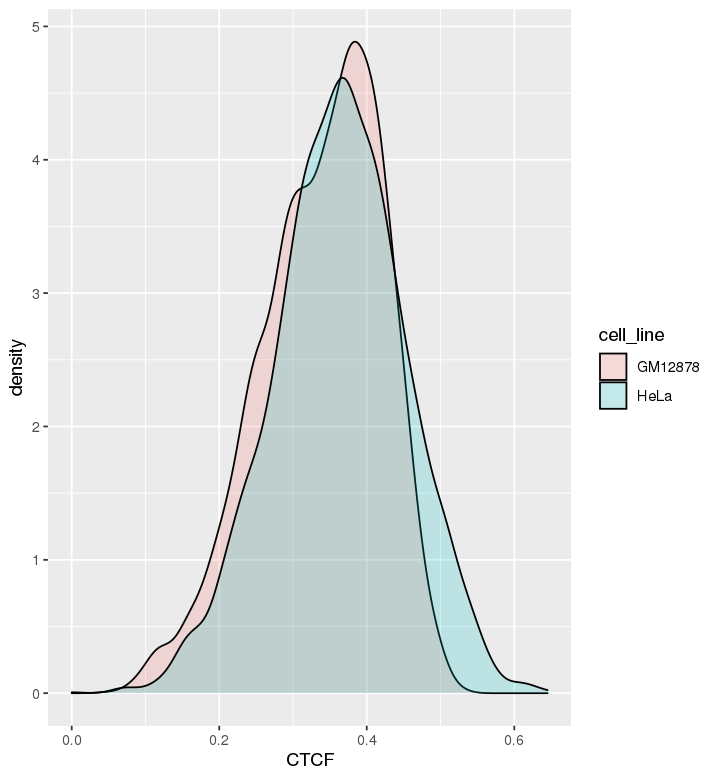

In [57]:
library(ggplot2)
p1 <- data.frame(CTCF = (df$GM_anchor1+df$GM_anchor2))
p2 <- data.frame(CTCF = (df$He_anchor1+df$He_anchor2))
p1$cell_line = 'GM12878'
p2$cell_line = 'HeLa'
p = rbind(p1,p2)
ggplot(p, aes(CTCF, fill = cell_line)) + geom_density(alpha = 0.2)


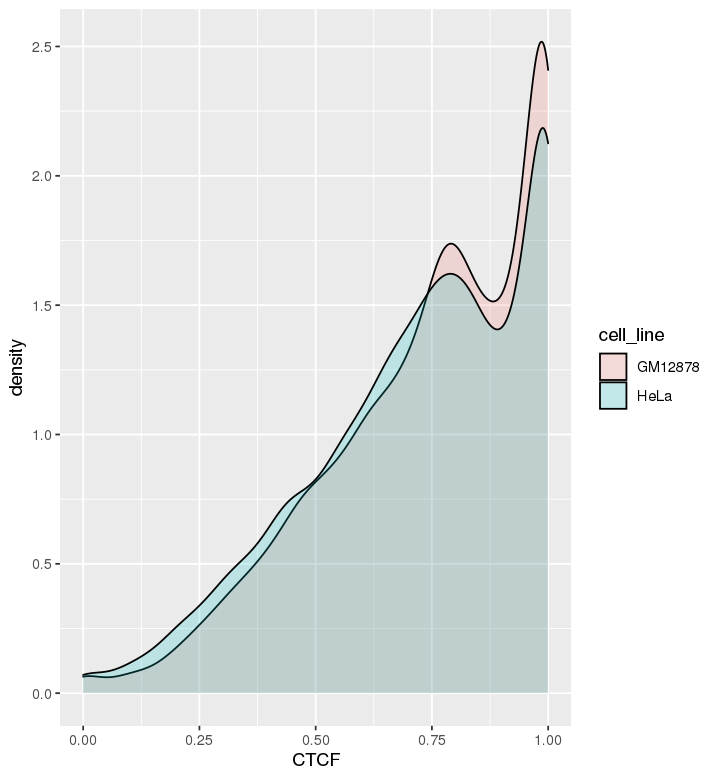

In [58]:
p1 <- data.frame(CTCF = (df$GM_window))
p2 <- data.frame(CTCF = (df$He_window)) 
p1$cell_line = 'GM12878'
p2$cell_line = 'HeLa'
p = rbind(p1,p2)
ggplot(p, aes(CTCF, fill = cell_line)) + geom_density(alpha = 0.2) + xlim(0,1)

In [59]:
dfG = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/GM12878/TF_E2_137_hg19_all_peak_pair_1M_CTCF_window.txt',header=TRUE))
dfH = data.frame(read.table('/home/wxi1/Desktop/data/GaffneyNG2019/CTCF_ChIAPET/HeLa/TF_E2_152_hg19_all_peak_pair_1M_CTCF_window.txt',header=TRUE))
row.names(dfG) = paste(dfG$peak1,dfG$peak2, sep="_")
row.names(dfH) = paste(dfH$peak1,dfH$peak2, sep="_")
dfG$prediction = dfG$p12*dfG$orientation*dfG$CTCF_window
dfH$prediction = dfH$p12*dfH$orientation*dfH$CTCF_window

In [178]:
df = data.frame(read.table('overlap_loop/GM12878_CTCF_PET_clusters_sorted_CTCF_signal_top10k_AND_HeLa.txt',header=F))
#df = data.frame(read.table('overlap_loop/HeLa_CTCF_PET_clusters_sorted_CTCF_signal_top10k_NOT_GM12878.txt',header=F))
colnames(df) = c('chr1','start1','end1','chr2','start2','end2','count','GM_anchor1','GM_anchor2','GM_window','He_anchor1','He_anchor2','He_window','p1','p2','p3','p4')
df = df[df$GM_anchor1*df$GM_anchor2*df$He_anchor1*df$He_anchor2>0,]
df = df[-grep(",", df$p1),]
df = df[-grep(",", df$p2),]
df = df[-grep(",", df$p3),]
df = df[-grep(",", df$p4),]
df$Gpeak = paste(df$p1,df$p2, sep="_")
df$Hpeak = paste(df$p3,df$p4, sep="_")

Warning message:
“Removed 120 rows containing non-finite values (stat_density).”
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
“Removed 189 rows containing non-finite values (stat_density).”


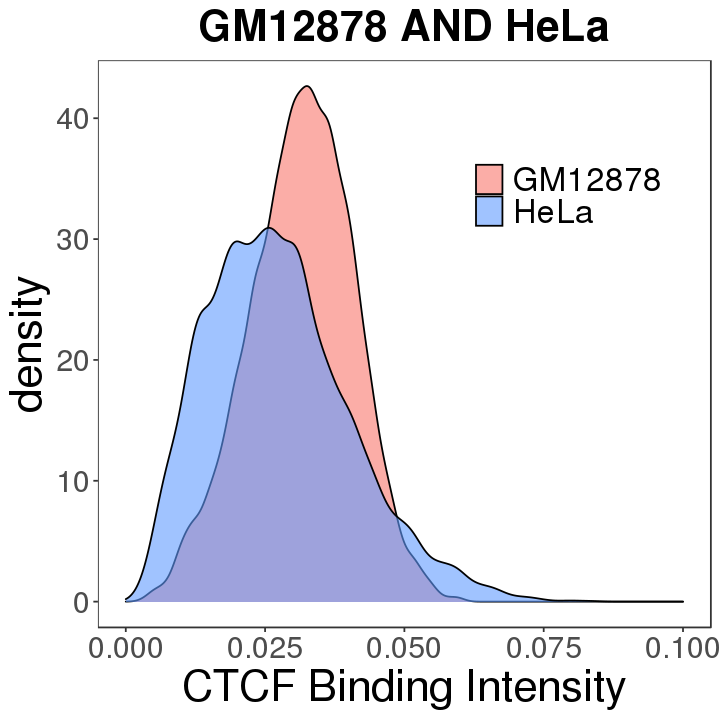

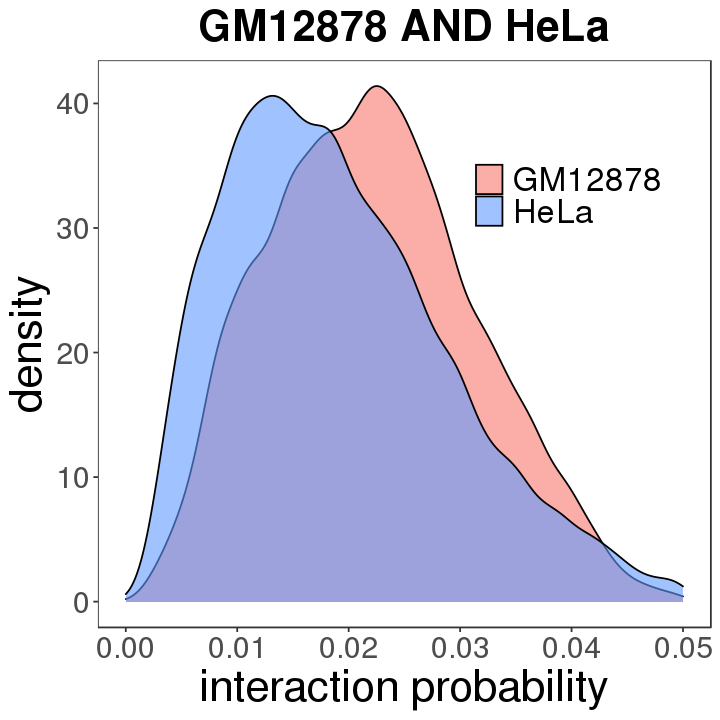

In [179]:
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, face="bold", hjust = 0.5),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 18),
  axis.text.y = element_text(size = 18),
  legend.text = element_text(size = 20), 
  legend.position = c(.6, .85),
  legend.justification = c("left", "top"),
  legend.title=element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())
options(repr.plot.width=6, repr.plot.height=6)
p1 <- data.frame(CTCF = dfG[df$Gpeak,]$p12)
p2 <- data.frame(CTCF = dfH[df$Hpeak,]$p12*1.1) 
p1$cell_line = 'GM12878'
p2$cell_line = 'HeLa'
p = rbind(p1,p2)
ggplot(p, aes(CTCF, fill = cell_line)) + geom_density(alpha = 0.6,adjust = 0.8) + xlim(0,0.1) + My_Theme + 
  ggtitle('GM12878 AND HeLa') + xlab('CTCF Binding Intensity') + 
  scale_fill_manual(values = c("#F8766D",'#619cff'))

p1 <- data.frame(probability = dfG[df$Gpeak,]$prediction)
p2 <- data.frame(probability = dfH[df$Hpeak,]$prediction*1.1) 
p1$cell_line = 'GM12878'
p2$cell_line = 'HeLa'
p = rbind(p1,p2)
ggplot(p, aes(probability, fill = cell_line)) + geom_density(alpha = 0.6,adjust = 0.8) + xlim(0,0.1) + My_Theme +
  ggtitle('GM12878 AND HeLa') + xlab('interaction probability')+ 
  scale_fill_manual(values = c("#F8766D",'#619cff'))+xlim(0,0.05)

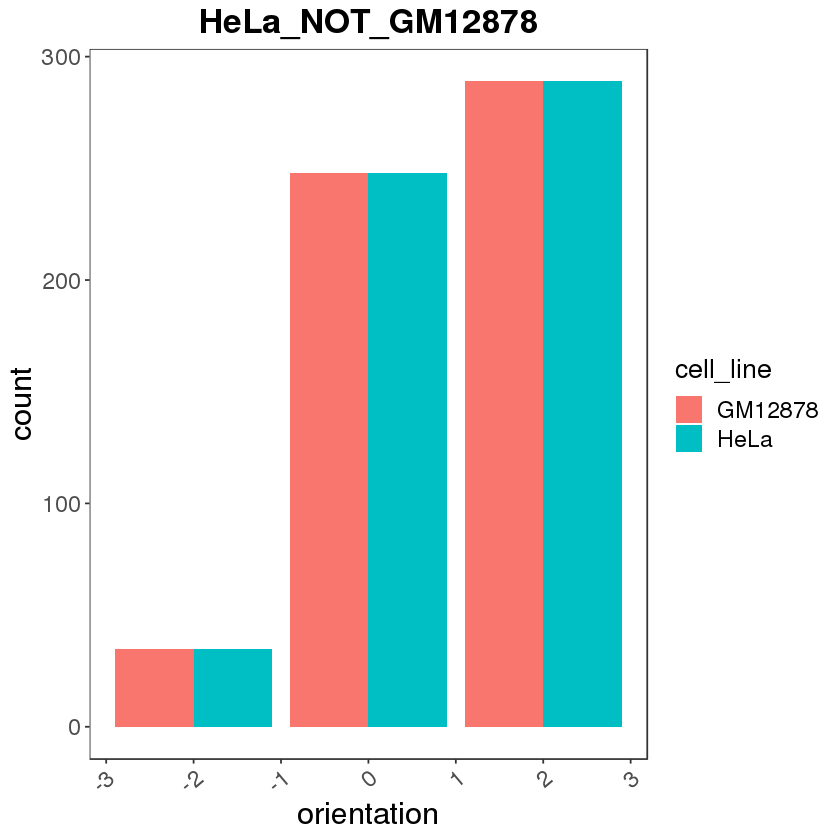

In [49]:
p1 <- data.frame(orientation = dfG[df$Gpeak,]$strand1 - dfG[df$Gpeak,]$strand2)
p2 <- data.frame(orientation = dfG[df$Gpeak,]$strand1 - dfG[df$Gpeak,]$strand2) 
p1$cell_line = 'GM12878'
p2$cell_line = 'HeLa'
p = melt(table(p = rbind(p1,p2)))
p$count = p$value
ggplot(p, aes(x = orientation, y = count, fill = cell_line)) + geom_bar(stat="identity", position=position_dodge()) + My_Theme +
  ggtitle('HeLa_NOT_GM12878')

In [59]:
sum(dfG$label==1)
sum(dfH$label==1)

[1] 55189

[1] 25408

In [87]:

library(VennDiagram)

Loading required package: grid

Loading required package: futile.logger



(polygon[GRID.polygon.4839], polygon[GRID.polygon.4840], polygon[GRID.polygon.4841], polygon[GRID.polygon.4842], text[GRID.text.4843], text[GRID.text.4844], lines[GRID.lines.4845], text[GRID.text.4846], text[GRID.text.4847], text[GRID.text.4848]) 

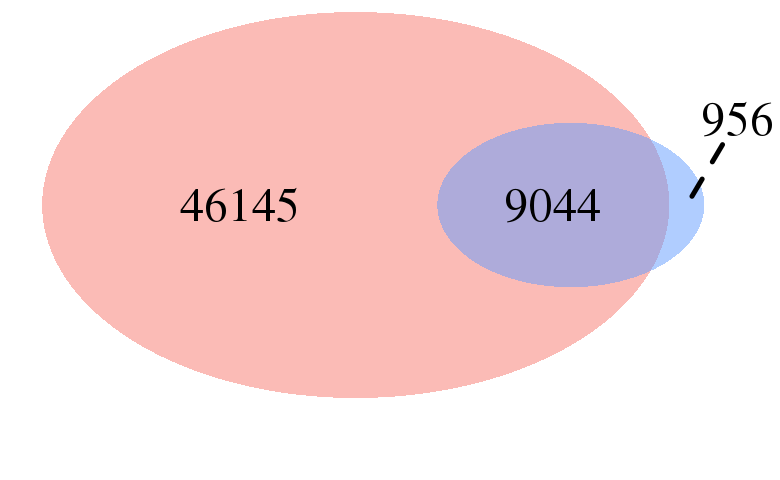

In [171]:
options(repr.plot.width=6.5, repr.plot.height=4)
draw.pairwise.venn(area1 = 10000, area2 = 55189, cross.area = 9044,
                   fill = c('#619cff',"#F8766D"),cex=2.4,
                                lty             = "blank",
                                cat.cex         = 3,
                                cat.pos         = c(1, 20),
                                cat.dist        = 0.09,
                                cat.just        = list(c(2.5, -12), c(-1.5, -14)),
                                ext.pos         = 20,
                                ext.dist        = 0.01,
                                ext.length      = 0.7,
                                ext.line.lwd    = 4,
                                ext.line.lty    = "dashed")

(polygon[GRID.polygon.4849], polygon[GRID.polygon.4850], polygon[GRID.polygon.4851], polygon[GRID.polygon.4852], text[GRID.text.4853], text[GRID.text.4854], text[GRID.text.4855], text[GRID.text.4856], text[GRID.text.4857]) 

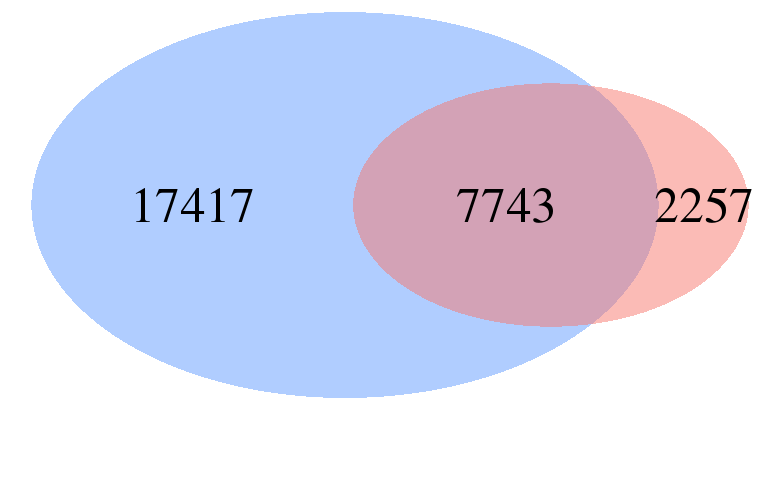

In [172]:
draw.pairwise.venn(area1 = 10000, area2 = 25160, cross.area = 7743,
                   fill = c("#F8766D",'#619cff'),cex=2.5,
                                lty             = "blank",
                                cat.cex         = 2,
                                cat.pos         = c(1, 20),
                                cat.dist        = 0.09,
                                cat.just        = list(c(2.5, -12), c(-1.5, -14)),
                                ext.pos         = 20,
                                ext.dist        = 0.01,
                                ext.length      = 0.7,
                                ext.line.lwd    = 4,
                                ext.line.lty    = "dashed")

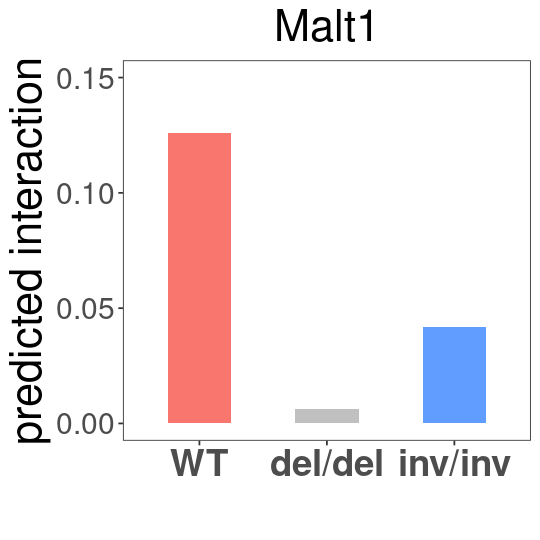

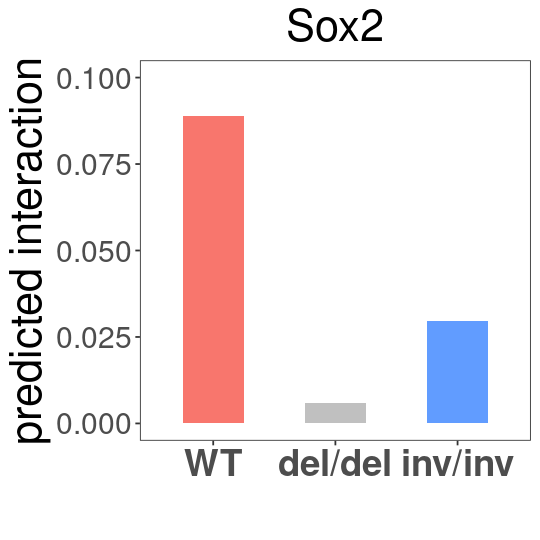

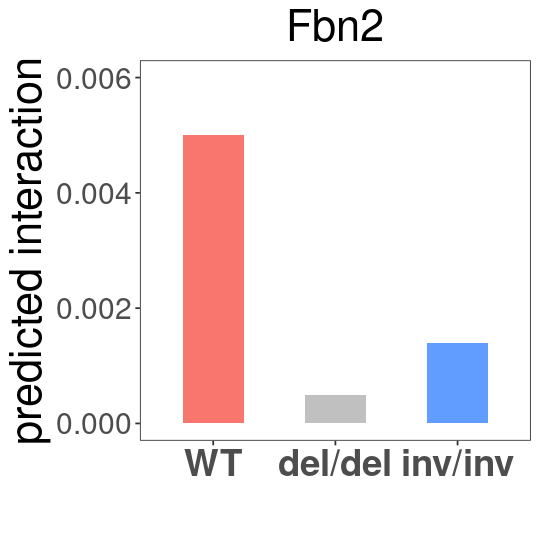

In [80]:
#95,47,15
library(ggplot2)
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, hjust = 0.5),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 22, face='bold'),
  axis.text.y = element_text(size = 18),
  legend.position = "none", 
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())
options(repr.plot.width=4.5, repr.plot.height=4.5)

pred = c(0.126,0.126/20,0.126/3)
class = c('WT','del/del','inv/inv')
df = data.frame(cbind(pred,class))
df$pred = as.numeric(as.character(df$pred))
df$class = factor(df$class,levels=c('WT','del/del','inv/inv'))
ggplot(df, aes(x = class, y = pred, fill = class)) + geom_bar(stat="identity", position=position_dodge(),width=0.5) +
  My_Theme + xlab('') + ylab('predicted interaction') +
  scale_fill_manual(values = c("#F8766D","#c0c0c0",'#619cff')) + ylim(0,0.15) + 
  ggtitle('Malt1')

pred = c(0.089,0.089/15,0.089/3)
class = c('WT','del/del','inv/inv')
df = data.frame(cbind(pred,class))
df$pred = as.numeric(as.character(df$pred))
df$class = factor(df$class,levels=c('WT','del/del','inv/inv'))
ggplot(df, aes(x = class, y = pred, fill = class)) + geom_bar(stat="identity", position=position_dodge(),width=0.5) +
  My_Theme + xlab('') + ylab('predicted interaction') +
  scale_fill_manual(values = c("#F8766D","#c0c0c0",'#619cff')) + ylim(0,0.1) + 
  ggtitle('Sox2')

pred = c(0.005,0.005/10,0.005/(3*1.2))
class = c('WT','del/del','inv/inv')
df = data.frame(cbind(pred,class))
df$pred = as.numeric(as.character(df$pred))
df$class = factor(df$class,levels=c('WT','del/del','inv/inv'))
ggplot(df, aes(x = class, y = pred, fill = class)) + geom_bar(stat="identity", position=position_dodge(),width=0.5) +
  My_Theme + xlab('') + ylab('predicted interaction') +
  scale_fill_manual(values = c("#F8766D","#c0c0c0",'#619cff')) + ylim(0,0.006) + 
  ggtitle('Fbn2')

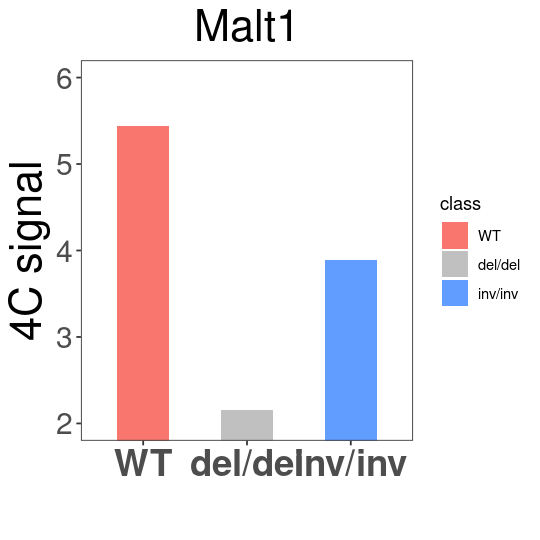

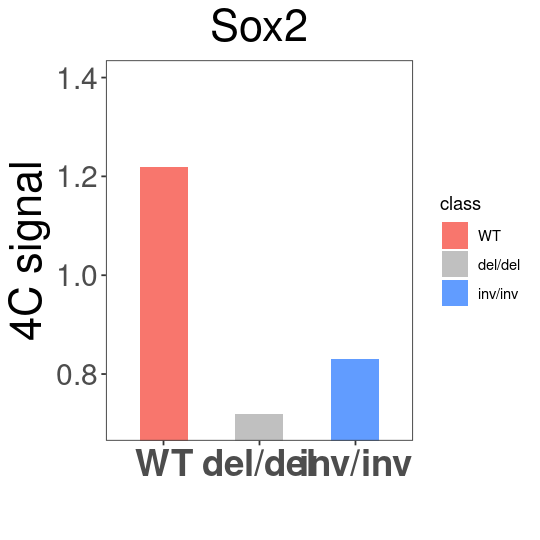

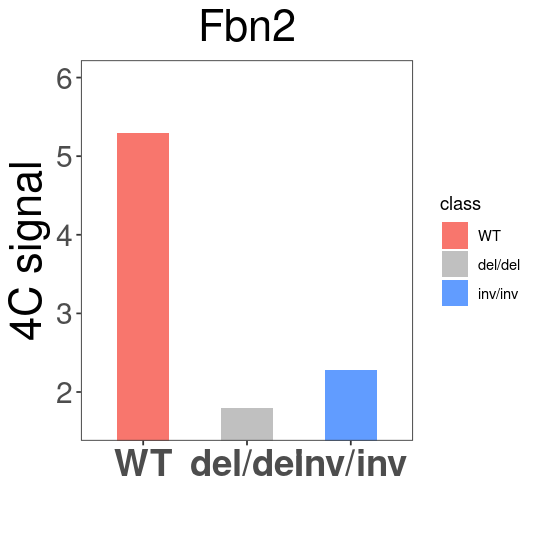

In [86]:
library(ggplot2)
My_Theme = theme_bw()+theme(
  plot.title = element_text(size=26, hjust = 0.5),
  axis.title = element_text(size = 26),
  axis.text.x = element_text(size = 22, face='bold'),
  axis.text.y = element_text(size = 18),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank())

options(repr.plot.width=4.5, repr.plot.height=4.5)

pred = c(5.44,2.16,3.89)
class = c('WT','del/del','inv/inv')
df = data.frame(cbind(pred,class))
df$pred = as.numeric(as.character(df$pred))
df$class = factor(df$class,levels=c('WT','del/del','inv/inv'))
ggplot(df, aes(x = class, y = pred, fill = class)) + geom_bar(stat="identity", position=position_dodge(),width=0.5) +
  My_Theme + xlab('') + ylab('4C signal') +
  scale_fill_manual(values = c("#F8766D","#c0c0c0",'#619cff')) + coord_cartesian(ylim=c(2,6)) + 
  ggtitle('Malt1')

pred = c(1.22,0.72,0.83)
class = c('WT','del/del','inv/inv')
df = data.frame(cbind(pred,class))
df$pred = as.numeric(as.character(df$pred))
df$class = factor(df$class,levels=c('WT','del/del','inv/inv'))
ggplot(df, aes(x = class, y = pred, fill = class)) + geom_bar(stat="identity", position=position_dodge(),width=0.5) +
  My_Theme + xlab('') + ylab('4C signal') +
  scale_fill_manual(values = c("#F8766D","#c0c0c0",'#619cff')) + coord_cartesian(ylim=c(0.7,1.4)) + 
  ggtitle('Sox2')

pred = c(5.29,1.8,2.28)
class = c('WT','del/del','inv/inv')
df = data.frame(cbind(pred,class))
df$pred = as.numeric(as.character(df$pred))
df$class = factor(df$class,levels=c('WT','del/del','inv/inv'))
ggplot(df, aes(x = class, y = pred, fill = class)) + geom_bar(stat="identity", position=position_dodge(),width=0.5) +
  My_Theme + xlab('') + ylab('4C signal') +
  scale_fill_manual(values = c("#F8766D","#c0c0c0",'#619cff')) + coord_cartesian(ylim=c(1.6,6)) + 
  ggtitle('Fbn2')

    pred class
1 0.0240   WT1
2 0.0024  del1
3 0.0170   WT2
4 0.0017  del2


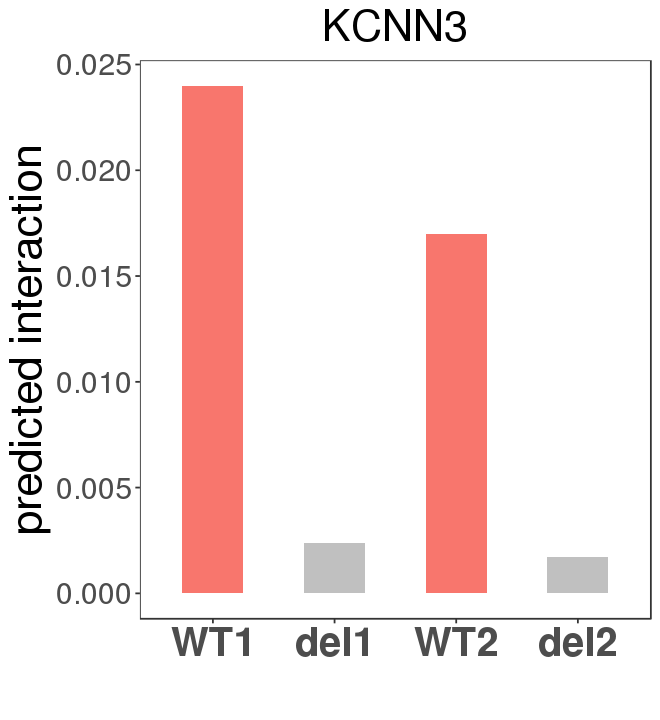

In [6]:
pred = c(0.024,0.024/10,0.017,0.017/10)
class = c('WT1','del1','WT2','del2')
df = data.frame(cbind(pred,class))
df$pred = as.numeric(as.character(df$pred))
df$class = factor(df$class,levels=c('WT1','del1','WT2','del2'))
print(df)
options(repr.plot.width=5.5, repr.plot.height=6)
ggplot(df, aes(x = class, y = pred, fill = class)) + geom_bar(stat="identity", position=position_dodge(),width=0.5) +
  My_Theme + xlab('') + ylab('predicted interaction') +
  scale_fill_manual(values = c("#F8766D","#c0c0c0","#F8766D","#c0c0c0")) + 
  ggtitle('KCNN3')

In [14]:
a = c(0.0001,0.0002,0.0004,0.0006,0.0008,0.001,0.0015,0.002,0.004,0.006,0.01)
auprc = c(0.379,0.448,0.535,0.581,0.600,0.603,0.578,0.537,0.3984,0.3228,0.2577)
df = data.frame(a = a, AUPRC = auprc)


In [18]:
require(PRROC)
df = data.frame(read.table('GM12878/iteration/TF_E2_137_hg19_training_prediction_lambda2.0_21.txt',header=T))


In [19]:
df = df[df$label!=-1,]
df = df[df$motif1>0,]
df = df[df$motif2>0,]
lambda = 1/3000000
df$processivity = exp(-df$distance*lambda)
df_pos = df[df$label == 1,]
df_neg = df[df$label == 0,]

In [20]:
auroc = c()
auprc = c()
for (i in 1:21){
    name = paste("competing_", i, sep = "")
    fg <- (df_pos$p12*df_pos[[name]]*df_pos$processivity)
    bg <- (df_neg$p12*df_neg[[name]]*df_neg$processivity)
    roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
    auroc = c(auroc,roc$auc)
    pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
    auprc = c(auprc, pr$auc.integral)
}

In [24]:
#df_auprc = data.frame('lambda1' = auprc)
#df_auprc$lambda2 = auprc
#df_auprc
write.csv(df_auprc,'GM12878/iteration/AUPRC_lambda.csv')

In [23]:
install.packages('reshape2')
library(reshape2)
m_df = melt(df_auprc)
m_df

Installing package into ‘/home/wxi1/R/x86_64-redhat-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

also installing the dependencies ‘stringi’, ‘plyr’, ‘Rcpp’, ‘stringr’


No id variables; using all as measure variables



variable,value
<fct>,<dbl>
lambda1,0.5038713
lambda1,0.5668193
lambda1,0.5842753
lambda1,0.5877540
lambda1,0.5886719
lambda1,0.5890003
lambda1,0.5891403
lambda1,0.5892047
lambda1,0.5892369


In [ ]:
ggplot2()

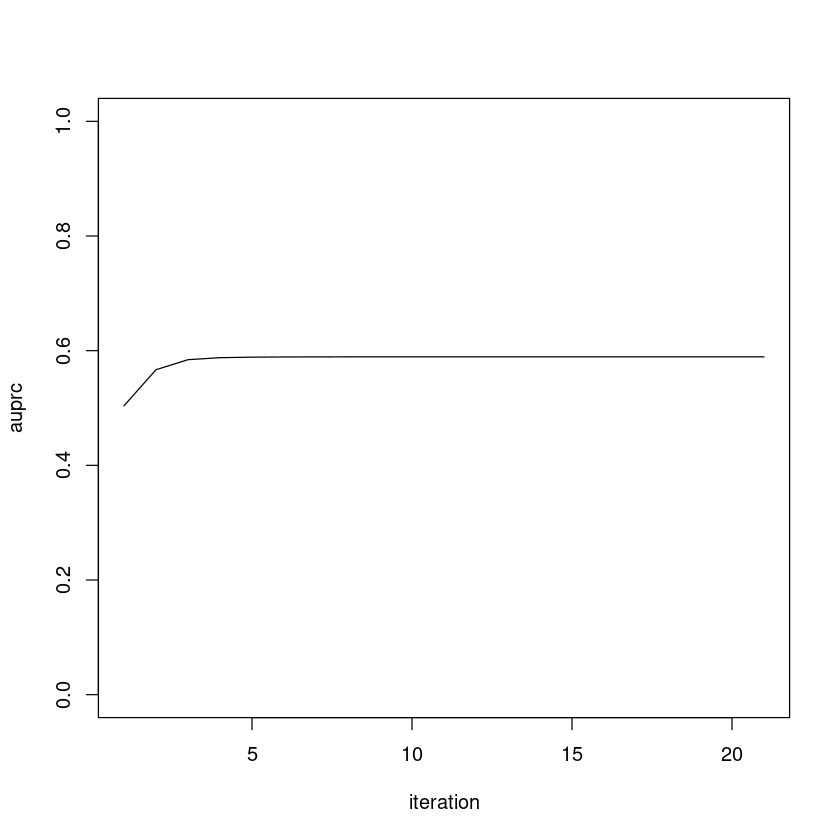

In [7]:
plot(auprc,ylim=c(0,1),type='l',xlab='iteration',xlim)

In [62]:
print(auprc)

 [1] 0.5038713 0.5885889 0.5391190 0.5883707 0.5490823 0.5862954 0.5513535
 [8] 0.5845436 0.5506169 0.5831655 0.5488701 0.5821305 0.5471399 0.5813817
[15] 0.5458234 0.5808554 0.5449503 0.5804868 0.5444358 0.5802252


 [1] 0.8962975 0.9904262 0.9870639 0.9980615 0.9958074 0.9992877 0.9978725
 [8] 0.9996642 0.9988265 0.9998248 0.9993798 0.9999034 0.9996840 0.9999439
[15] 0.9998372 0.9999656 0.9999118 0.9999777 0.9999487 0.9999848 0.9999680
[22] 0.9999893 0.9999787 0.9999922 0.9999851 0.9999941 0.9999892 0.9999955
[29] 0.9999918 0.9999965 0.9999937 0.9999972 0.9999951 0.9999978 0.9999961
[36] 0.9999982 0.9999968 0.9999985 0.9999974


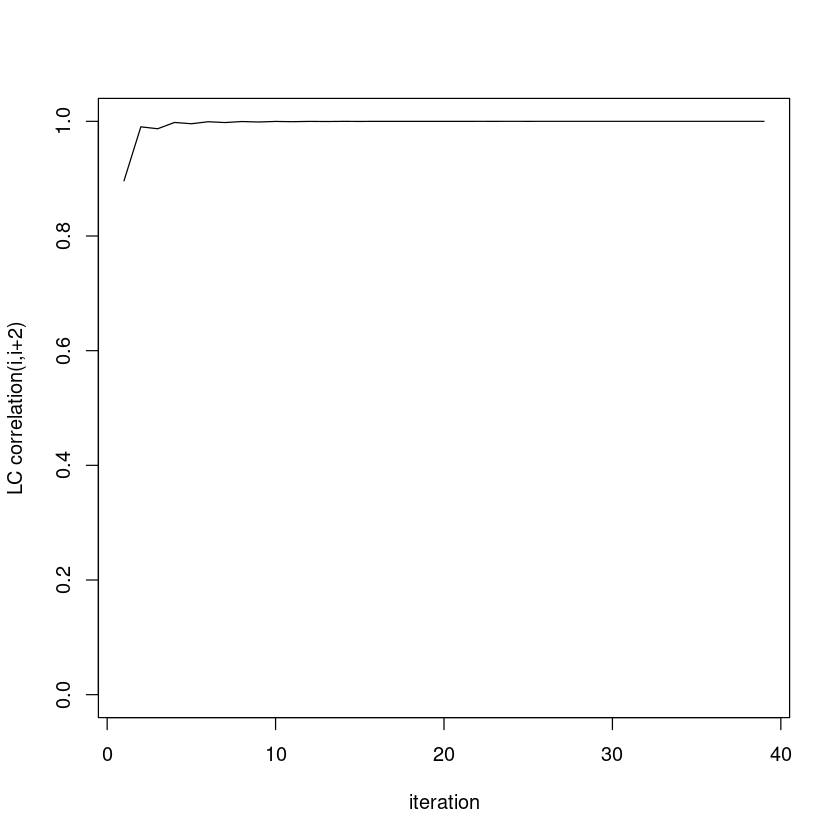

In [76]:
corr = c()
for (i in 1:39){
    name1 = paste("competing_", i, sep = "")
    name2 = paste("competing_", i+2, sep = "")
    corr = c(corr,cor(df[[name1]],df[[name2]]))
}
plot(corr,ylim=c(0,1),type='l',xlab='iteration',ylab='LC correlation(i,i+2)')
print(corr)

In [126]:
df = data.frame(read.table('overlap_loop/TF_E2_137_hg19_training_prediction_CTCF_window_celltype.txt',header=T))


In [127]:
df = df[df$label!=-1,]
df = df[df$motif1>0,]
df = df[df$motif2>0,]

df_pos = df[df$celltype_label == 1,]
df_neg = df[df$label == 0,]
df_neg = df_neg[sample(nrow(df_neg), sum(df$celltype_label == 1)*5),]

In [128]:
dim(df_pos)

[1] 1729   21

In [129]:
fg <- (df_pos$p12*df_pos$CTCF_window)
bg <- (df_neg$p12*df_neg$CTCF_window)
roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
#roc$auc
#pr$auc.integral
roc
pr


  ROC curve

    Area under curve:
     0.9897516 

    Curve for scores from  2.031388e-08  to  0.08361038 
    ( can be plotted with plot(x) )



  Precision-recall curve

    Area under curve (Integral):
     0.9551275 

    Area under curve (Davis & Goadrich):
     0.9551275 

    Curve for scores from  2.031388e-08  to  0.08361038 
    ( can be plotted with plot(x) )
